In [253]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from IPython.display import display
import requests
import seaborn as sns
import csv
import json
import fiona
from matplotlib.lines import Line2D



import geopandas as gpd
from matplotlib.colors import LinearSegmentedColormap

import warnings
warnings.filterwarnings('ignore')


## Introduction

We used the US Census Bureau Household Pulse Survey to analyze the US States with the highest self reported rates of anxiety and depression through the period of May 2020 through October 2023. We hypothesized that the states with the lowest reports of anxiety and depression would have a more favorable quality of life as measured by data on food insecurity, housing insecurity, health care, excess deaths, wages and per capita income,  education spending, educational attainment, and student debt burden. Conversely, we expected the states with the highest rates of self reported depression and anxiety to experience a markedly poorer quality of life based on these same factors. We hypothsized that self reported mental illness is significantly impacted by external factors.

In [2]:
csvpath = os.path.join("csv-data", "anxiety-depression-data.csv")

df = pd.read_csv(csvpath)

by_state_df = df[(df['State'] != 'United States') & 
                (df['Group'] == 'By State') & 
                (df['Indicator'] == 'Symptoms of Anxiety Disorder or Depressive Disorder')]
by_state_df['date_column'] = pd.to_datetime(by_state_df['Time Period Start Date'], format='%m/%d/%Y')
by_state_df['Year'] = by_state_df['date_column'].dt.year

state_mean_df = by_state_df.groupby('State')['Value'].mean()
had_states_val = state_mean_df.nlargest(3)
lad_states_val = state_mean_df.nsmallest(3)


lad_states = lad_states_val.index
had_states = had_states_val.index

In [250]:
had_states_val = state_mean_df.nlargest(3)
lad_states_val = state_mean_df.nsmallest(3)

had_states_val = had_states_val.round(2)
lad_states_val = lad_states_val.round(2)

lad_states_val_title = "States with the lowest reported rate of anxiety and depression (percentage of population)"
print(lad_states_val_title)
print(lad_states_val)
print("-------")
had_states_val_title = "States with the highest reported rate of anxiety and depression (percentage of population)"
print(had_states_val_title)
print(had_states_val)


States with the lowest reported rate of anxiety and depression (percentage of population)
State
South Dakota    28.50
Minnesota       29.11
North Dakota    29.57
Name: Value, dtype: float64
-------
States with the highest reported rate of anxiety and depression (percentage of population)
State
Louisiana      39.57
Mississippi    38.79
Oklahoma       38.15
Name: Value, dtype: float64


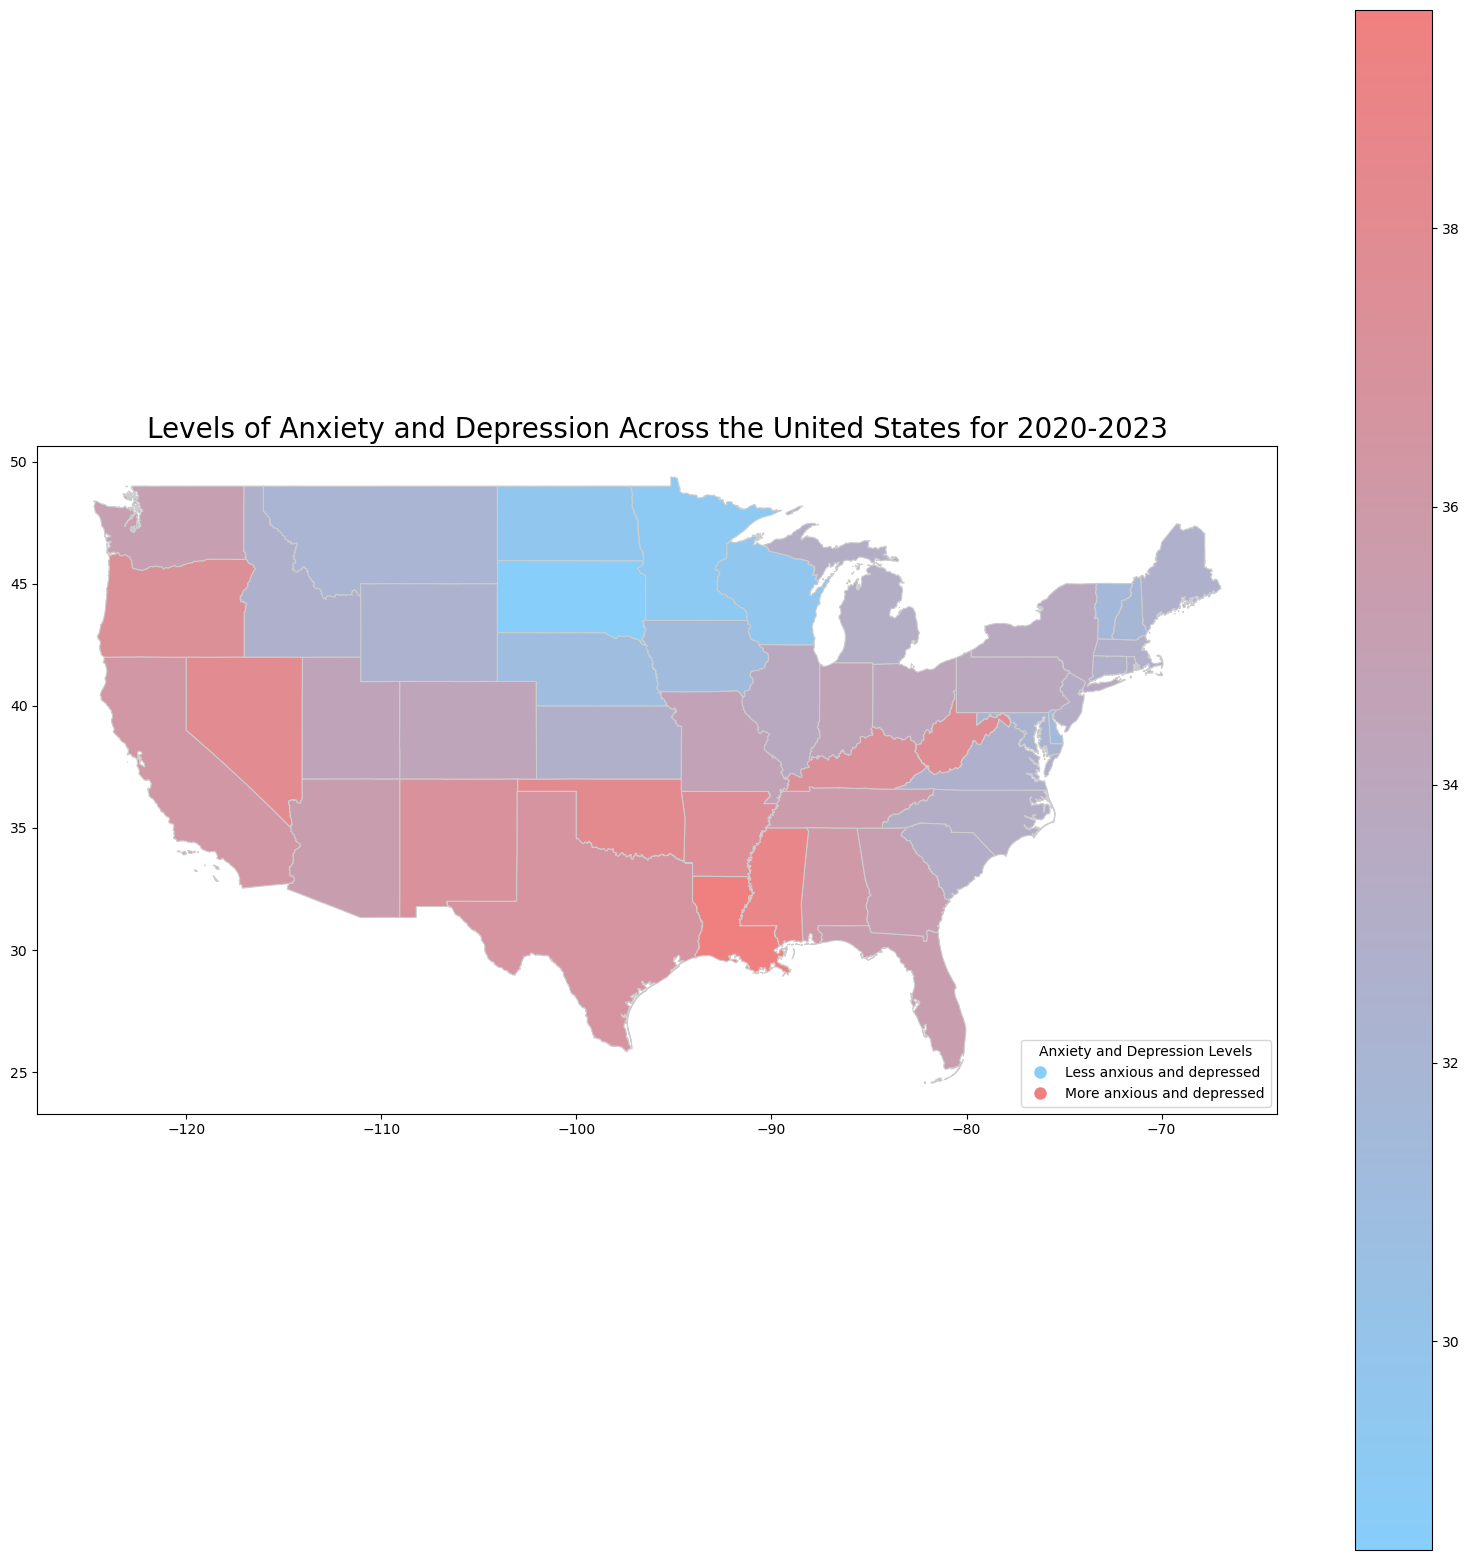

In [255]:
json_path = os.path.join('csv-data', 'gz_2010_us_040_00_500k.json')
us_states = gpd.read_file(json_path)

us_states['State'] = us_states['NAME']
us_states = us_states.drop(columns=['NAME']).loc[(us_states['State'] != 'Alaska') 
                                                & (us_states['State'] != 'Hawaii')]
merged_df = us_states.merge(state_mean_df, on='State')

fig, ax = plt.subplots(1, 1, figsize=(20, 20))

color1 = 'lightskyblue'
color2 = 'lightcoral'
cmap = LinearSegmentedColormap.from_list('custom_cmap', [color1, color2])
merged_df.plot(column='Value', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend='true')

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Less anxious and depressed',
                          markerfacecolor=color1, markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='More anxious and depressed',
                          markerfacecolor=color2, markersize=10)]

ax.legend(handles=legend_elements, loc='lower right', title='Anxiety and Depression Levels')

plt.title('Levels of Anxiety and Depression Across the United States for 2020-2023', fontsize=20)
plt.show()

## Total Population of Target States

In [5]:
census_csv = os.path.join('csv-data', '2022-census.csv')
census_df = pd.read_csv(census_csv)
drop_columns = ['SUMLEV', 'ESTIMATESBASE2020', 'REGION', 'STATE', 'DIVISION']
population_df = census_df[census_df['NAME'].isin(lad_states + had_states)].drop(columns=drop_columns)

south_dakota_row = census_df[census_df['NAME'] == 'South Dakota']
minnesota_row = census_df[census_df['NAME'] == 'Minnesota']
north_dakota_row = census_df[census_df['NAME'] == 'North Dakota']

louisiana_row = census_df[census_df['NAME'] == 'Louisiana']
mississippi_row = census_df[census_df['NAME'] == 'Mississippi']
oklahoma_row = census_df[census_df['NAME'] == 'Oklahoma']

south_dakota_average_population = south_dakota_row[['POPESTIMATE2020', 'POPESTIMATE2021', 'POPESTIMATE2022']].astype(int).mean(axis=1)
south_dakota_pop = round(south_dakota_average_population.values[0])

minnesota_average_population = minnesota_row[['POPESTIMATE2020', 'POPESTIMATE2021', 'POPESTIMATE2022']].astype(int).mean(axis=1)
minnesota_pop = round(minnesota_average_population.values[0])

north_dakota_average_population = north_dakota_row[['POPESTIMATE2020', 'POPESTIMATE2021', 'POPESTIMATE2022']].astype(int).mean(axis=1)
north_dakota_pop = round(north_dakota_average_population.values[0])

louisiana_average_population = louisiana_row[['POPESTIMATE2020', 'POPESTIMATE2021', 'POPESTIMATE2022']].astype(int).mean(axis=1)
lousiana_pop = round(louisiana_average_population.values[0])

mississippi_average_population = mississippi_row[['POPESTIMATE2020', 'POPESTIMATE2021', 'POPESTIMATE2022']].astype(int).mean(axis=1)
mississippi_pop = round(mississippi_average_population.values[0])

oklahoma_average_population = oklahoma_row[['POPESTIMATE2020', 'POPESTIMATE2021', 'POPESTIMATE2022']].astype(int).mean(axis=1)
oklahoma_pop = round(oklahoma_average_population.values[0])

##----##
pop = {'State Name' : ['Louisiana', 'Mississippi', 'Oklahoma', 'South Dakota', 'Minnesota',  'North Dakota'],
              'Population' : [lousiana_pop, mississippi_pop, oklahoma_pop, south_dakota_pop, minnesota_pop, north_dakota_pop]}

In [264]:
census_csv = os.path.join('csv-data', '2022-census.csv')
census_df = pd.read_csv(census_csv)
drop_columns = ['SUMLEV', 'ESTIMATESBASE2020', 'REGION', 'STATE', 'DIVISION']

selected_states = ['Louisiana', 'Mississippi', 'Oklahoma', 'South Dakota', 'Minnesota', 'North Dakota']
population_data = []

for state in selected_states:
    state_row = census_df[census_df['NAME'] == state]
    average_population = state_row[['POPESTIMATE2020', 'POPESTIMATE2021', 'POPESTIMATE2022']].astype(int).mean(axis=1)
    state_population = round(average_population.values[0])
    population_data.append({'State Name': state, 'Average Population': state_population})

pop_df = pd.DataFrame(population_data)
pop_df

,State Name,Average Population
0,Louisiana,4623001
1,Mississippi,2949261
2,Oklahoma,3991979
3,South Dakota,897929
4,Minnesota,5712836
5,North Dakota,778904


## Food Insecurity

In [338]:
csvpath_food = os.path.join("csv-data", "food-insecurity-data.csv")
dffood = pd.read_csv(csvpath_food)


In [340]:
lad_states = ['South Dakota', 'Minnesota', 'North Dakota']
lad_states_food_insecurity = dffood[dffood['Area'].isin(lad_states)]

In [341]:
average_food_insecurity_south_dakota = lad_states_food_insecurity.loc[lad_states_food_insecurity['Area'] == 'South Dakota', 'Percent - Percent Food Scarcity'].mean()
average_food_insecurity_south_dakota = round(average_food_insecurity_south_dakota, 2)
print(f"The average percent of the population which is food insecure in South Dakota is: {average_food_insecurity_south_dakota}%")

average_food_insecurity_minnesota = lad_states_food_insecurity.loc[lad_states_food_insecurity['Area'] == 'Minnesota', 'Percent - Percent Food Scarcity'].mean()
average_food_insecurity_minnesota = round(average_food_insecurity_minnesota, 2)
print(f"The average percent of the population which is food insecure in Minnesota is: {average_food_insecurity_minnesota}%")

average_food_insecurity_north_dakota = lad_states_food_insecurity.loc[lad_states_food_insecurity['Area'] == 'North Dakota', 'Percent - Percent Food Scarcity'].mean()
average_food_insecurity_north_dakota = round(average_food_insecurity_north_dakota, 2)
print(f"The average percent of the population which is food insecure in North Dakota is: {average_food_insecurity_north_dakota}%")



The average percent of the population which is food insecure in South Dakota is: 8.62%
The average percent of the population which is food insecure in Minnesota is: 6.79%
The average percent of the population which is food insecure in North Dakota is: 8.57%


In [342]:
had_states = ['Louisiana', 'Mississippi', 'Oklahoma']
had_states_food_insecurity = dffood[dffood['Area'].isin(had_states)]

In [343]:
average_food_insecurity_louisiana = had_states_food_insecurity.loc[had_states_food_insecurity['Area'] == 'Louisiana', 'Percent - Percent Food Scarcity'].mean()
average_food_insecurity_louisiana = round(average_food_insecurity_louisiana, 2)
print(f"The average percent of the population which is food insecure in Louisiana is: {average_food_insecurity_louisiana}%")

average_food_insecurity_mississippi = had_states_food_insecurity.loc[had_states_food_insecurity['Area'] == 'Mississippi', 'Percent - Percent Food Scarcity'].mean()
average_food_insecurity_mississippi = round(average_food_insecurity_mississippi, 2)
print(f"The average percent of the population which is food insecure in Mississippi is: {average_food_insecurity_mississippi}%")

average_food_insecurity_oklahoma = had_states_food_insecurity.loc[had_states_food_insecurity['Area'] == 'Oklahoma', 'Percent - Percent Food Scarcity'].mean()
average_food_insecurity_oklahoma = round(average_food_insecurity_oklahoma, 2)
print(f"The average percent of the population which is food insecure in Oklahoma is {average_food_insecurity_oklahoma}%")

The average percent of the population which is food insecure in Louisiana is: 14.88%
The average percent of the population which is food insecure in Mississippi is: 16.02%
The average percent of the population which is food insecure in Oklahoma is 12.55%


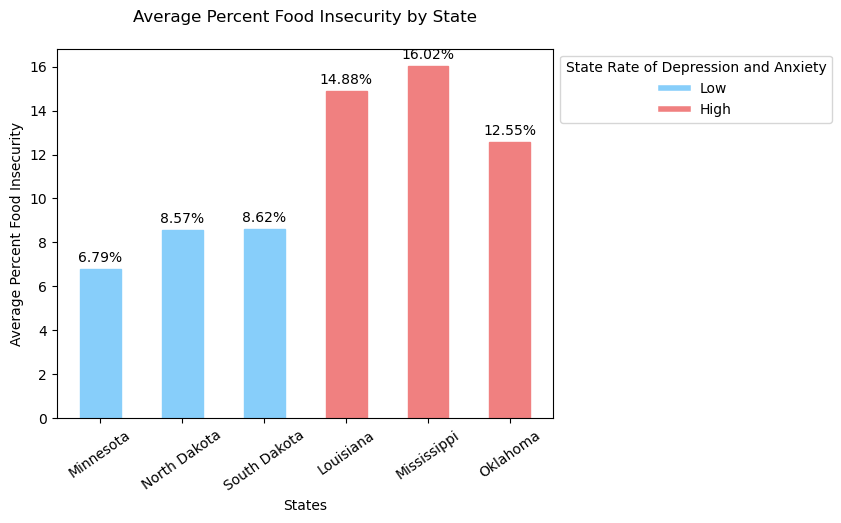

In [351]:
states = ['Minnesota', 'North Dakota', 'South Dakota', 'Louisiana', 'Mississippi', 'Oklahoma']
food_insecurity_values = [6.79, 8.57, 8.62, 14.88, 16.02, 12.55]

fig, ax = plt.subplots()

bar_width = 0.5

x = range(len(states))

bars = ax.bar(x, food_insecurity_values, bar_width, label='Average Food Insecurity')

for i, state in enumerate(states):
    if state in ['North Dakota', 'South Dakota', 'Minnesota']:
        bars[i].set_color('lightskyblue')
    elif state in ['Louisiana', 'Mississippi', 'Oklahoma']:
        bars[i].set_color('lightcoral')

ax.set_xlabel('States')
ax.set_ylabel('Average Percent Food Insecurity')
ax.set_title('Average Percent Food Insecurity by State', y=1.05)  # Adjust title position
ax.set_xticks(x)
ax.set_xticklabels(states, rotation=35)

for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.annotate('{}%'.format(food_insecurity_values[i]), xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom')

legend_labels = [plt.Line2D([0], [0], color='lightskyblue', lw=4),
                 plt.Line2D([0], [0], color='lightcoral', lw=4)]
ax.legend(legend_labels, ['Low', 'High'], title='State Rate of Depression and Anxiety', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

## Housing Insecurity

In [377]:
csvpath_housing1 = os.path.join("csv-data", "weeks-1-12-housing-insecurity-data.csv")
dfhousing1 = pd.read_csv(csvpath_housing1)
csvpath_housing2 = os.path.join("csv-data", "weeks-13-45-housing-insecurity-data.csv")
dfhousing2 = pd.read_csv(csvpath_housing2)
merge_dfhousing = pd.merge(dfhousing1,dfhousing2, on = "Area")


In [378]:
lad_states = ['South Dakota', 'Minnesota', 'North Dakota']
lad_states_housing_insecurity = merge_dfhousing[merge_dfhousing['Area'].isin(lad_states)]


In [379]:
average_housing_insecurity_south_dakota = lad_states_housing_insecurity.loc[lad_states_housing_insecurity['Area'] == 'South Dakota', 'Percent - Percent Housing Insecurity (Missed Payment or Low Confidence)'].mean()
average_housing_insecurity_south_dakota = round(average_housing_insecurity_south_dakota, 2)
print(f"The average percent of the population which is housing insecure in South Dakota is: {average_housing_insecurity_south_dakota}")
average_housing_insecurity_minnesota = lad_states_housing_insecurity.loc[lad_states_housing_insecurity['Area'] == 'Minnesota', 'Percent - Percent Housing Insecurity (Missed Payment or Low Confidence)'].mean()
average_housing_insecurity_minnesota = round(average_housing_insecurity_minnesota, 2)
print(f"The average percent of the population which is housing insecure in Minnesota is: {average_housing_insecurity_minnesota}%")
average_housing_insecurity_north_dakota = lad_states_housing_insecurity.loc[lad_states_housing_insecurity['Area'] == 'North Dakota', 'Percent - Percent Housing Insecurity (Missed Payment or Low Confidence)'].mean()
average_housing_insecurity_north_dakota = round(average_housing_insecurity_north_dakota, 2)
print(f"The average percent of the population which is housing insecure in North Dakota is: {average_housing_insecurity_north_dakota}%")


The average percent of the population which is housing insecure in South Dakota is: 20.36
The average percent of the population which is housing insecure in Minnesota is: 14.77%
The average percent of the population which is housing insecure in North Dakota is: 19.09%


In [380]:
had_states = ['Louisiana', 'Mississippi', 'Oklahoma']
had_states_housing_insecurity = merge_dfhousing[merge_dfhousing['Area'].isin(had_states)]


In [382]:
average_housing_insecurity_louisiana = had_states_housing_insecurity.loc[had_states_housing_insecurity['Area'] == 'Louisiana', 'Percent - Percent Housing Insecurity (Missed Payment or Low Confidence)'].mean()
average_housing_insecurity_louisiana = round(average_housing_insecurity_louisiana, 2)
print(f"The average percent of the population which is housing insecure in Louisiana is: {average_housing_insecurity_louisiana}%")

average_housing_insecurity_mississippi = had_states_housing_insecurity.loc[had_states_housing_insecurity['Area'] == 'Mississippi', 'Percent - Percent Housing Insecurity (Missed Payment or Low Confidence)'].mean()
average_housing_insecurity_mississippi = round(average_housing_insecurity_mississippi, 2)
print(f"The average percent of the population which is housing insecure in Mississippi is: {average_housing_insecurity_mississippi}%")

average_housing_insecurity_oklahoma = had_states_housing_insecurity.loc[had_states_housing_insecurity['Area'] == 'Oklahoma', 'Percent - Percent Housing Insecurity (Missed Payment or Low Confidence)'].mean()
average_housing_insecurity_oklahoma = round(average_housing_insecurity_oklahoma, 2)
print(f"The average percent of the population which is housing insecure in Oklahoma is:{average_housing_insecurity_oklahoma}%")

The average percent of the population which is housing insecure in Louisiana is: 32.0%
The average percent of the population which is housing insecure in Mississippi is: 36.61%
The average percent of the population which is housing insecure in Oklahoma is:25.39%


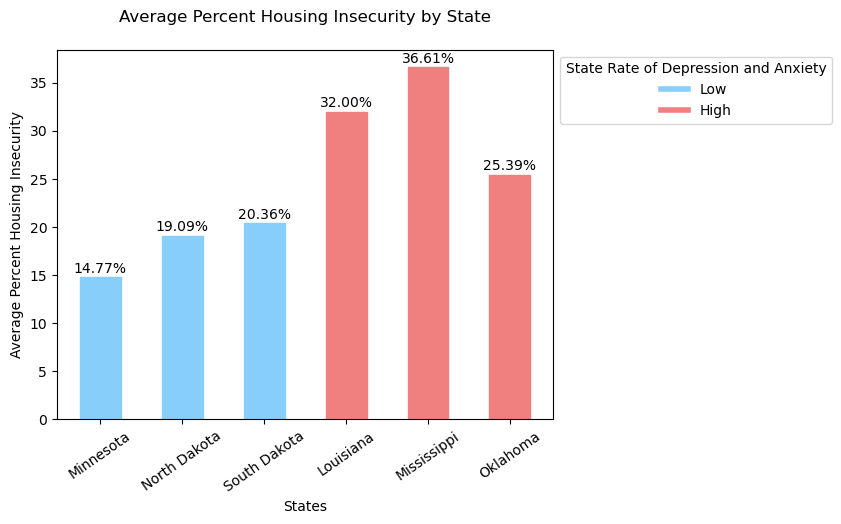

In [385]:
states = ['Minnesota', 'North Dakota', 'South Dakota', 'Louisiana', 'Mississippi', 'Oklahoma']
housing_insecurity_values = [14.77, 19.09, 20.36, 32.0, 36.61, 25.39]

fig, ax = plt.subplots()

bar_width = 0.5

x = range(len(states))

bars1 = ax.bar(x, housing_insecurity_values, bar_width, label='Average Housing Insecurity', edgecolor='none')  # Remove outline

for i, state in enumerate(states):
    if state in ['North Dakota', 'South Dakota', 'Minnesota']:
        bars1[i].set_color('lightskyblue')
    elif state in ['Louisiana', 'Mississippi', 'Oklahoma']:
        bars1[i].set_color('lightcoral')

ax.set_xlabel('States')
ax.set_ylabel('Average Percent Housing Insecurity')
ax.set_title('Average Percent Housing Insecurity by State', pad=20)  # Add padding to the title
ax.set_xticks(x)
ax.set_xticklabels(states, rotation=35)

for i, v in enumerate(housing_insecurity_values):
    ax.text(i, v + 0.5, f'{v:.2f}%', ha='center')  # Show percentages with 2 decimal places


legend_labels = [plt.Line2D([0], [0], color='lightskyblue', lw=4),
                 plt.Line2D([0], [0], color='lightcoral', lw=4)]
ax.legend(legend_labels, ['Low', 'High'], title='State Rate of Depression and Anxiety', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

## Death Statistics

In [7]:
unin_2019_path =  os.path.join('csv-data', '2019-unisured-pop-data.csv')
unin_2021_path =  os.path.join('csv-data', '2021-unisured-pop-data.csv')
unin_2022_path =  os.path.join('csv-data', '2022-unisured-pop-data.csv')
overdose_path =  os.path.join('csv-data', 'VSRR_Provisional_Drug_Overdose_Death_Counts.csv')
death_path =  os.path.join('csv-data', 'Weekly_Counts_of_Death_by_Jurisdiction_and_Select_Causes_of_Death.csv')

unin_2019_full_df =  pd.read_csv(unin_2019_path)
unin_2021_full_df =  pd.read_csv(unin_2021_path)
unin_2022_full_df =  pd.read_csv(unin_2022_path)
overdose_full_df = pd.read_csv(overdose_path)
death_full_df = pd.read_csv(death_path)

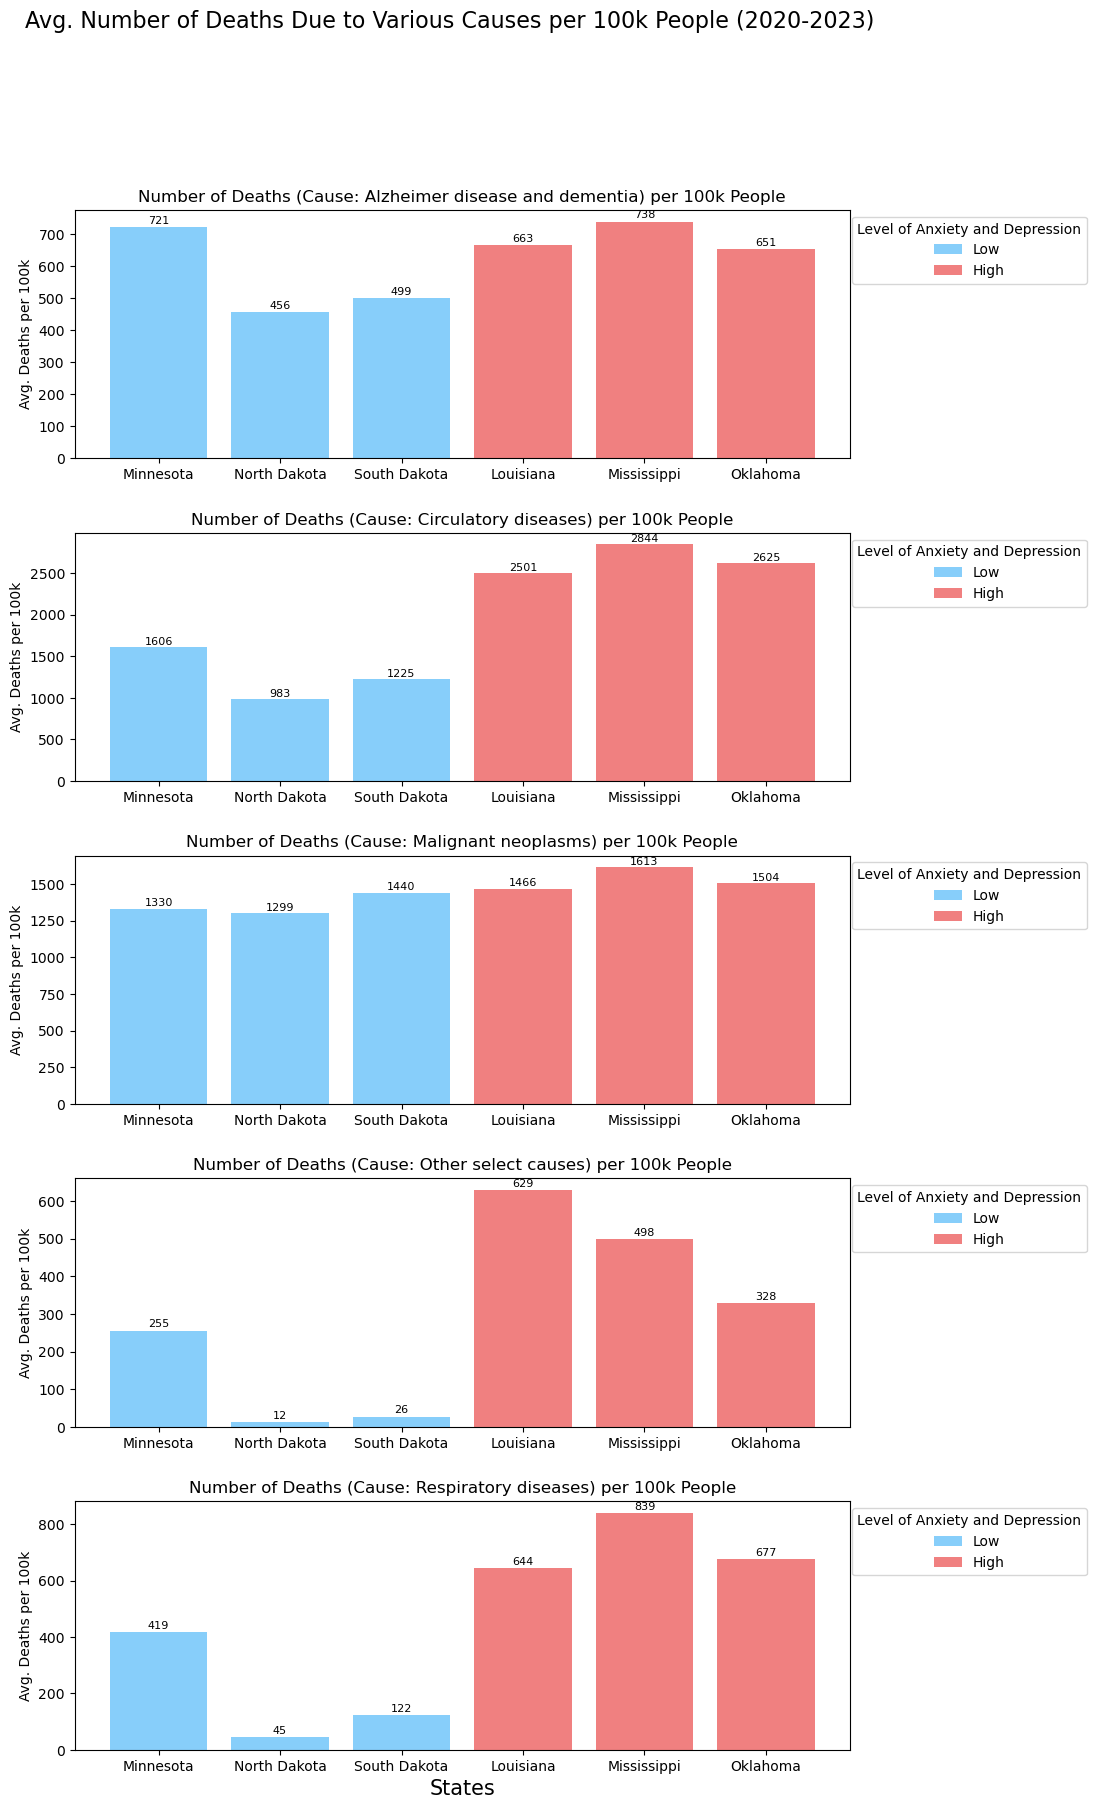

In [258]:
death_clean_df = death_full_df.loc[death_full_df['Time Period']!='2015-2019']
death_clean_df.rename(columns={'Jurisdiction': 'State Name'}, inplace=True)
death_clean_df = pd.merge(death_clean_df, pd.DataFrame(pop), on='State Name')

lad_death_clean_df = death_clean_df.loc[death_clean_df['State Name'].isin(lad_states)]
lad_death_clean_df = lad_death_clean_df.groupby(['Year', 'State Name', 'Population', 'Cause Group']) \
                    ['Number of Deaths'].sum().reset_index(level='Population')
lad_death_clean_df['Per Capita (100,000 of pop)'] = lad_death_clean_df['Number of Deaths']/(lad_death_clean_df['Population']/100000)
lad_death_clean_df_avg = lad_death_clean_df.groupby(['Cause Group', 'State Name'])['Per Capita (100,000 of pop)'].sum()

had_death_clean_df = death_clean_df.loc[death_clean_df['State Name'].isin(had_states)]
had_death_clean_df = had_death_clean_df.groupby(['Cause Group', 'Year', 'State Name', 'Population']) \
                    ['Number of Deaths'].sum().reset_index(level='Population')
had_death_clean_df['Per Capita (100,000 of pop)'] = had_death_clean_df['Number of Deaths']/(had_death_clean_df['Population']/100000)
had_death_clean_df_avg = had_death_clean_df.groupby(['Cause Group', 'State Name'])['Per Capita (100,000 of pop)'].sum()

causes = death_clean_df['Cause Group'].unique()

fig, axs = plt.subplots(5, 1, figsize=(10, 20))
fig.suptitle('Avg. Number of Deaths Due to Various Causes per 100k People (2020-2023)', fontsize=16)
axs = axs.flatten()
i=0
for cause in causes:
    axs[i].bar(lad_death_clean_df_avg[cause].index, lad_death_clean_df_avg[cause], color='lightskyblue')
    axs[i].bar(had_death_clean_df_avg[cause].index, had_death_clean_df_avg[cause], color='lightcoral')
    for x, y in zip(lad_death_clean_df_avg[cause].index, lad_death_clean_df_avg[cause]):
        axs[i].text(x, y + 5, f'{y:.0f}', ha='center', va='bottom', fontsize=8)
    for x, y in zip(had_death_clean_df_avg[cause].index, had_death_clean_df_avg[cause]):
        axs[i].text(x, y + 5, f'{y:.0f}', ha='center', va='bottom', fontsize=8)
        
    axs[i].set_title(f'Number of Deaths (Cause: {cause}) per 100k People')
    axs[i].set_ylabel('Avg. Deaths per 100k', fontsize=10)
    axs[i].legend(title='Level of Anxiety and Depression', labels=['Low', 'High'], loc='upper right', bbox_to_anchor=(1.315, 1))
    i = i+1
axs[i-1].set_xlabel('States', fontsize=15)
plt.subplots_adjust(hspace=0.3)
plt.show()

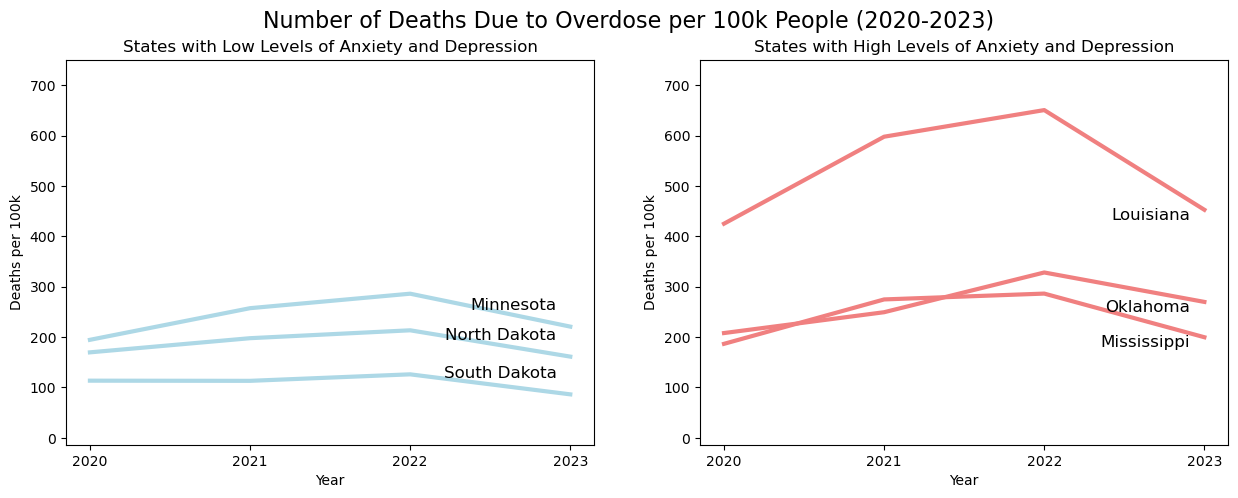

In [9]:
overdose_clean_df = overdose_full_df.loc[(overdose_full_df['Indicator'] == 'Number of Drug Overdose Deaths') 
                                        & (overdose_full_df['Year'] >= 2020)]
overdose_clean_df = pd.merge(overdose_clean_df, pd.DataFrame(pop), on='State Name')
lad_overdose_clean_df = overdose_clean_df.loc[overdose_clean_df['State Name'].isin(lad_states)]
lad_overdose_clean_df = lad_overdose_clean_df.groupby(['Year', 'State Name', 'Population']) \
                        ['Data Value'].sum().reset_index(level='Population')
lad_overdose_clean_df['Per Capita (100,000 of pop)'] = lad_overdose_clean_df['Data Value']/(lad_overdose_clean_df['Population']/100000)
lad_overdose_clean_df_tot = lad_overdose_clean_df.groupby(['State Name', 'Year'])['Per Capita (100,000 of pop)'].sum()

had_overdose_clean_df = overdose_clean_df.loc[overdose_clean_df['State Name'].isin(had_states)]
had_overdose_clean_df = had_overdose_clean_df.groupby(['Year', 'State Name', 'Population']) \
                        ['Data Value'].sum().reset_index(level='Population')
had_overdose_clean_df['Per Capita (100,000 of pop)'] = had_overdose_clean_df['Data Value']/(had_overdose_clean_df['Population']/100000)
had_overdose_clean_df_tot = had_overdose_clean_df.groupby(['State Name', 'Year'])['Per Capita (100,000 of pop)'].sum()

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Number of Deaths Due to Overdose per 100k People (2020-2023)', fontsize=16)
low_lim = min(lad_overdose_clean_df_tot.min(), had_overdose_clean_df_tot.min()) - 100
hig_lim = max(lad_overdose_clean_df_tot.max(), had_overdose_clean_df_tot.max()) + 100


for state in lad_states:
    axs[0].plot(lad_overdose_clean_df_tot[state].index.astype(str), lad_overdose_clean_df_tot[state], color='lightblue', linewidth=3)
    axs[0].annotate(state, (lad_overdose_clean_df_tot[state].index[-1].astype(str), lad_overdose_clean_df_tot[state].iloc[-1]),
                 textcoords="offset points", xytext=(-10, 12), ha='right', fontsize=12)
    axs[0].set_ylim(low_lim, hig_lim)
    axs[0].set_title('States with Low Levels of Anxiety and Depression')
    axs[0].set_ylabel('Deaths per 100k', fontsize=10)
    axs[0].set_xlabel('Year', fontsize=10)
for state in had_states:
    axs[1].plot(had_overdose_clean_df_tot[state].index.astype(str), had_overdose_clean_df_tot[state], color='lightcoral', linewidth=3)
    axs[1].annotate(state, (had_overdose_clean_df_tot[state].index[-1].astype(str), had_overdose_clean_df_tot[state].iloc[-1]),
                 textcoords="offset points", xytext=(-10, -7), ha='right', fontsize=12)
    axs[1].set_ylim(low_lim, hig_lim)
    axs[1].set_title('States with High Levels of Anxiety and Depression')
    axs[1].set_ylabel('Deaths per 100k', fontsize=10)
    axs[1].set_xlabel('Year', fontsize=10)

## Health Insurance Statistics

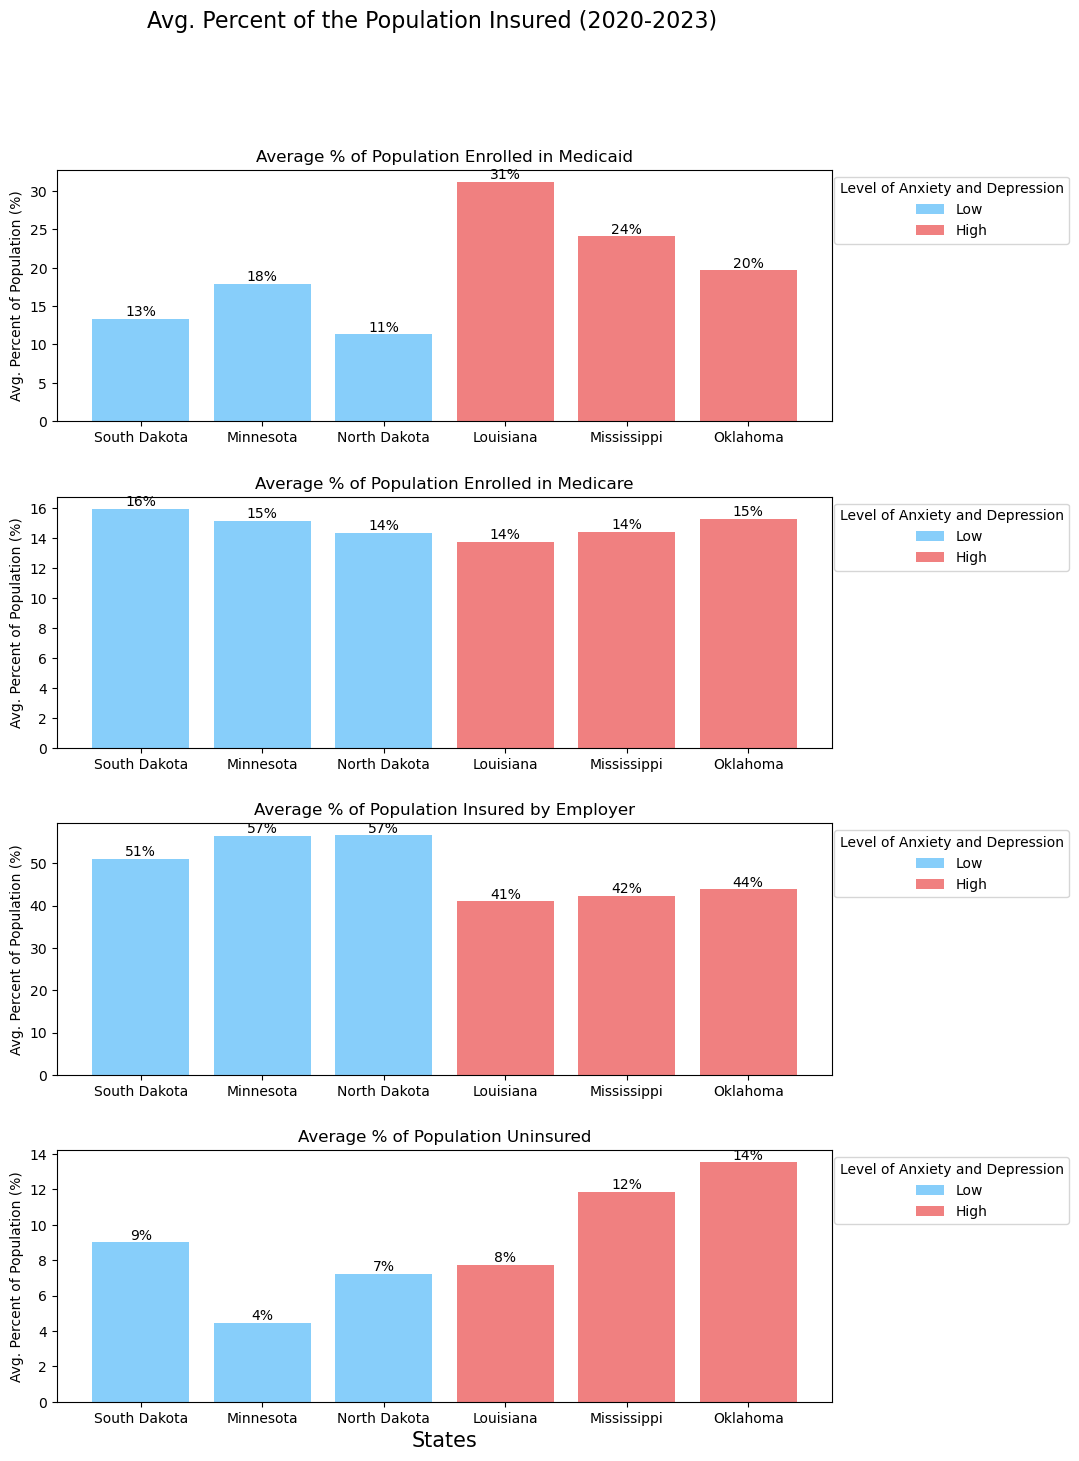

In [10]:
in_clean_df = pd.merge(unin_2019_full_df[['Location', 'Medicaid', 'Medicare', 'Uninsured', 'Employer']], 
                        unin_2021_full_df[['Location', 'Medicaid', 'Medicare', 'Uninsured', 'Employer']], on = 'Location')
in_clean_df = pd.merge(in_clean_df, unin_2022_full_df[['Location', 'Medicaid', 'Medicare', 
                                                       'Uninsured', 'Employer']], on = 'Location').dropna(how='any')
lad_states
lad_state_in_clean_df = []
for states in lad_states:
    lad_state_in_clean_df.append(in_clean_df.loc[in_clean_df['Location'] == states])
    
lad_state_in_clean_df = pd.concat(lad_state_in_clean_df, ignore_index=True)
lad_state_in_clean_df = lad_state_in_clean_df.rename(columns= {'Medicaid_x': 'Medicaid_2019',
                             'Medicaid_y': 'Medicaid_2021',
                             'Medicaid': 'Medicaid_2022',
                             'Medicare_x': 'Medicare_2019',
                             'Medicare_y': 'Medicare_2021',
                             'Medicare': 'Medicare_2022',
                             'Uninsured_x': 'Uninsured_2019',
                             'Uninsured_y': 'Uninsured_2021',
                             'Uninsured': 'Uninsured_2022',
                             'Employer_y': 'Employer_2021',
                             'Employer': 'Employer_2022',
                             'Employer_x': 'Employer_2019'})

avg_medicaid_lad = np.mean(lad_state_in_clean_df.set_index('Location')[['Medicaid_2019',
                                                                       'Medicaid_2021',
                                                                       'Medicaid_2022']], axis=1)
avg_medicare_lad = np.mean(lad_state_in_clean_df.set_index('Location')[['Medicare_2019',
                                                                       'Medicare_2021',
                                                                       'Medicare_2022']], axis=1)
avg_uninsured_lad = np.mean(lad_state_in_clean_df.set_index('Location')[['Uninsured_2019',
                                                                        'Uninsured_2021',
                                                                        'Uninsured_2022']], axis=1)
avg_employer_lad = np.mean(lad_state_in_clean_df.set_index('Location')[['Employer_2019',
                                                                        'Employer_2021',
                                                                        'Employer_2022']], axis=1)

had_state_in_clean_df = []
for states in had_states:
    had_state_in_clean_df.append(in_clean_df.loc[in_clean_df['Location'] == states])
    
had_state_in_clean_df = pd.concat(had_state_in_clean_df, ignore_index=True)
had_state_in_clean_df = had_state_in_clean_df.rename(columns= {'Medicaid_x': 'Medicaid_2019',
                             'Medicaid_y': 'Medicaid_2021',
                             'Medicaid': 'Medicaid_2022',
                             'Medicare_x': 'Medicare_2019',
                             'Medicare_y': 'Medicare_2021',
                             'Medicare': 'Medicare_2022',
                             'Uninsured_x': 'Uninsured_2019',
                             'Uninsured_y': 'Uninsured_2021',
                             'Uninsured': 'Uninsured_2022',
                             'Employer_y': 'Employer_2021',
                             'Employer': 'Employer_2022',
                             'Employer_x': 'Employer_2019'})

avg_medicaid_had = np.mean(had_state_in_clean_df.set_index('Location')[['Medicaid_2019',
                                                                       'Medicaid_2021',
                                                                       'Medicaid_2022']], axis=1)
avg_medicare_had = np.mean(had_state_in_clean_df.set_index('Location')[['Medicare_2019',
                                                                       'Medicare_2021',
                                                                       'Medicare_2022']], axis=1)
avg_uninsured_had = np.mean(had_state_in_clean_df.set_index('Location')[['Uninsured_2019',
                                                                       'Uninsured_2021',
                                                                       'Uninsured_2022']], axis=1)
avg_employer_had = np.mean(had_state_in_clean_df.set_index('Location')[['Employer_2019',
                                                                       'Employer_2021',
                                                                       'Employer_2022']], axis=1)

def plot_insurance(data_lad, data_had, title, i):
    axs[i].bar(data_lad.index, data_lad*100, color='lightskyblue', label='Group 1')
    axs[i].bar(data_had.index, data_had*100, color='lightcoral', label='Group 2')
    axs[i].set_title(title)
    axs[i].set_ylabel('Avg. Percent of Population (%)')
    axs[i].legend(title='Level of Anxiety and Depression', labels=['Low', 'High'], loc='upper right', bbox_to_anchor=(1.315, 1))
            # Add text labels for lad_death_clean_df_avg
    for x, y in zip(data_lad.index, data_lad*100):
        axs[i].text(x, y, f'{y:.0f}%', ha='center', va='bottom', fontsize=10)
    for x, y in zip(data_had.index, data_had*100):
        axs[i].text(x, y, f'{y:.0f}%', ha='center', va='bottom', fontsize=10)
    
fig, axs = plt.subplots(4, 1, figsize=(10, 16))
fig.suptitle('Avg. Percent of the Population Insured (2020-2023)', fontsize=16)
plot_insurance(avg_medicaid_lad, avg_medicaid_had, 'Average % of Population Enrolled in Medicaid', 0)
plot_insurance(avg_medicare_lad, avg_medicare_had, 'Average % of Population Enrolled in Medicare', 1)
plot_insurance(avg_employer_lad, avg_employer_had, 'Average % of Population Insured by Employer', 2)
plot_insurance(avg_uninsured_lad, avg_uninsured_had, 'Average % of Population Uninsured', 3)

axs[3].set_xlabel('States', fontsize=15)
plt.subplots_adjust(hspace=0.3)
plt.show()

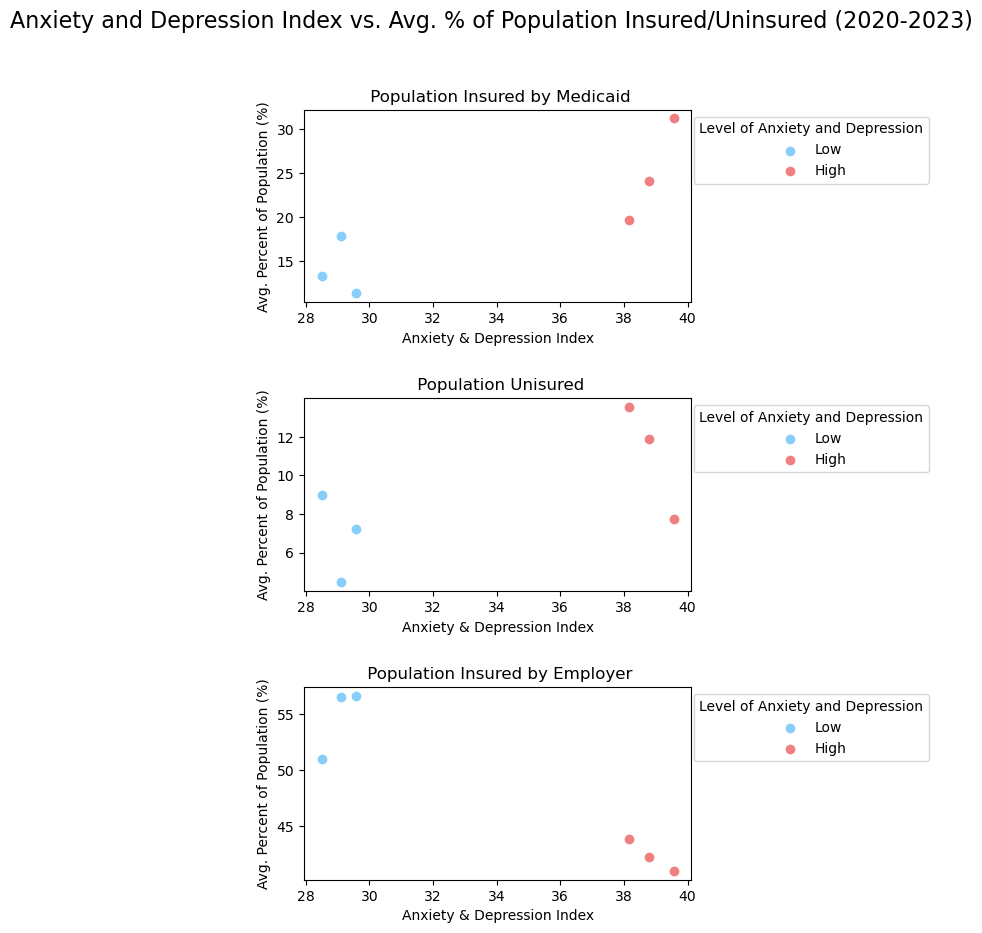

In [11]:
def scatter_plot(data_lad, data_had, ax, title):
    data_lad = pd.DataFrame(data_lad, columns=['Avg In']).rename_axis('State').reset_index()
    data_lad = pd.merge(data_lad, lad_states_val, on='State')
    data_lad['Plot Color Index'] = [0, 0, 0]
    data_had = pd.DataFrame(data_had, columns=['Avg In']).rename_axis('State').reset_index()
    data_had = pd.merge(data_had, had_states_val, on='State')
    data_had['Plot Color Index'] = [1, 1, 1]
    
    axs[ax].scatter(data_lad['Value'], data_lad['Avg In']*100, c='lightskyblue')
    axs[ax].scatter(data_had['Value'], data_had['Avg In']*100, c='lightcoral')
    axs[ax].set_title(title)
    axs[ax].set_ylabel('Avg. Percent of Population (%)')
    axs[ax].set_xlabel('Anxiety & Depression Index')
    axs[ax].legend(title='Level of Anxiety and Depression', labels=['Low', 'High'], loc='upper right', bbox_to_anchor=(1.63, 1))

fig, axs = plt.subplots(3, 1, figsize=(5,10))
fig.suptitle('Anxiety and Depression Index vs. Avg. % of Population Insured/Uninsured (2020-2023)', fontsize=16)
scatter_plot(avg_medicaid_lad, avg_medicaid_had, 0, ' Population Insured by Medicaid')
scatter_plot(avg_uninsured_lad, avg_uninsured_had, 1, ' Population Unisured')
scatter_plot(avg_employer_lad, avg_employer_had, 2, ' Population Insured by Employer')
plt.subplots_adjust(hspace=0.5)
plt.show()

## Per Capita Income

In [290]:
csvpath = os.path.join("csv-data", "income_per_capita_bystate.csv")
df = pd.read_csv(csvpath, encoding='latin1') 
columns_of_interest = ['Description', '2020', '2021', '2022']
df_selected = df[['State'] + columns_of_interest]

states_of_interest = ['North Dakota', 'Minnesota', 'South Dakota', 'Louisiana', 'Mississippi', 'Oklahoma']
df_filtered = df_selected[df_selected['State'].isin(states_of_interest)].copy()  
df_filtered = df_filtered.loc[df_filtered["Description"] == "Per capita personal income (dollars) 4/"]
df_filtered

,State,Description,2020,2021,2022
26615,Louisiana,Per capita personal income (dollars) 4/,50243.0,54531.0,54501.0
31353,Minnesota,Per capita personal income (dollars) 4/,61278.0,66846.0,68840.0
33377,Mississippi,Per capita personal income (dollars) 4/,42513.0,46577.0,46370.0
47154,North Dakota,Per capita personal income (dollars) 4/,61091.0,65895.0,70360.0
50443,Oklahoma,Per capita personal income (dollars) 4/,50249.0,55165.0,56298.0
55871,South Dakota,Per capita personal income (dollars) 4/,59465.0,65421.0,68176.0


In [296]:
# Remove commas from the income columns and convert to numeric
df_filtered[['2020', '2021', '2022']] = df_filtered[['2020', '2021', '2022']].replace(',', '', regex=True)
df_filtered[['2020', '2021', '2022']] = df_filtered[['2020', '2021', '2022']].apply(pd.to_numeric, errors='coerce')

# Calculate the average of 2020, 2021, and 2022 columns
df_filtered['Average_Income'] = df_filtered[['2020', '2021', '2022']].mean(axis=1).round().astype(int)

# Drop the original columns and the "Description" column
df_filtered_mean = df_filtered.drop(['2020', '2021', '2022', 'Description'], axis=1)

# Reset the index to keep "Description" as a column
df_filtered_mean = df_filtered_mean.reset_index(drop=True)

# Display the resulting DataFrame
df_filtered_mean

,State,Average_Income
0,Louisiana,53092
1,Minnesota,65655
2,Mississippi,45153
3,North Dakota,65782
4,Oklahoma,53904
5,South Dakota,64354


In [299]:
df_filtered_mean['Depression and Anxiety Level'] = df_filtered_mean['State'].apply(
    lambda x: 'High' if x in ['Louisiana', 'Mississippi', 'Oklahoma'] else 'Low'
)

df_filtered_sorted = df_filtered_mean.sort_values(by='Depression and Anxiety Level')

df_filtered_sorted

,State,Average_Income,Depression and Anxiety Level
0,Louisiana,53092,High
2,Mississippi,45153,High
4,Oklahoma,53904,High
1,Minnesota,65655,Low
3,North Dakota,65782,Low
5,South Dakota,64354,Low


In [305]:
df_grouped = df_filtered_sorted.groupby('Depression and Anxiety Level').mean('Average_Income').round().astype(int)

df_grouped

,Average_Income
Depression and Anxiety Level,
High,50716
Low,65264


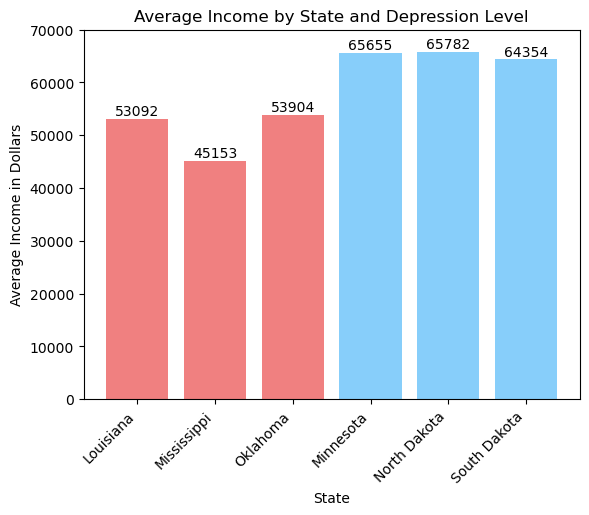

In [307]:
colors = df_filtered_sorted['Depression and Anxiety Level'].map({'High': 'lightcoral', 'Low': 'lightskyblue'})

bars = plt.bar(df_filtered_sorted['State'], df_filtered_sorted['Average_Income'], color=colors)

for bar, value in zip(bars, df_filtered_sorted['Average_Income']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 100, str(value), ha='center', va='bottom')

plt.ylim(0, 70000)
plt.xticks(rotation=45, ha='right')
plt.xlabel('State')
plt.ylabel('Average Income in Dollars')
plt.title('Average Income by State and Depression Level')

plt.show()


## Occupation and Wages

In [388]:
industries_csv = os.path.join("csv-data", "state_industry.csv")
raw_industries = pd.read_csv(industries_csv)
state_industries = raw_industries[(raw_industries['O_GROUP'] == 'major')]

lad_states = ['South Dakota', 'Minnesota', 'North Dakota']
lad_states_industries = state_industries[state_industries['AREA_TITLE'].isin(lad_states)]
lad_states_industries = lad_states_industries.rename(columns={'OCC_TITLE': 'Occupation', 'H_MEDIAN': 'Median Hourly Wage', 'A_MEDIAN':'Median Annual Wage'})

had_states = ['Louisiana', 'Mississippi', 'Oklahoma']

had_states_industries = state_industries[state_industries['AREA_TITLE'].isin(had_states)]
had_states_industries = had_states_industries.rename(columns={'OCC_TITLE': 'Occupation', 'H_MEDIAN': 'Median Hourly Wage', 'A_MEDIAN':'Median Annual Wage'})


In [124]:
south_dakota_rows = lad_states_industries.loc[lad_states_industries['AREA_TITLE'] == 'South Dakota', ['TOT_EMP']]
total_employment_south_dakota = south_dakota_rows['TOT_EMP'].astype(float).sum()
print(f'Total Employment in South Dakota: {total_employment_south_dakota}')

minnesota_rows = lad_states_industries.loc[lad_states_industries['AREA_TITLE'] == 'Minnesota', ['TOT_EMP']]
total_employment_minnesota= minnesota_rows['TOT_EMP'].astype(float).sum()
print(f'Total Employment in Minnesota: {total_employment_minnesota}')

north_dakota_rows = lad_states_industries.loc[lad_states_industries['AREA_TITLE'] == 'North Dakota', ['TOT_EMP']]
total_employment_north_dakota = north_dakota_rows['TOT_EMP'].astype(float).sum()
print(f'Total Employment in North Dakota: {total_employment_north_dakota}')



Total Employment in South Dakota: 435260.0
Total Employment in Minnesota: 2827300.0
Total Employment in North Dakota: 405490.0


In [125]:
louisiana_rows = had_states_industries.loc[had_states_industries['AREA_TITLE'] == 'Louisiana', ['TOT_EMP']]
total_employment_louisiana = louisiana_rows['TOT_EMP'].astype(float).sum()
print(f'Total Employment in Louisiana: {total_employment_louisiana}')

mississippi_rows = had_states_industries.loc[had_states_industries['AREA_TITLE'] == 'Mississippi', ['TOT_EMP']]
total_employment_mississippi = mississippi_rows['TOT_EMP'].astype(float).sum()
print(f'Total Employment in Mississippi: {total_employment_mississippi}')

oklahoma_rows = had_states_industries.loc[had_states_industries['AREA_TITLE'] == 'Oklahoma', ['TOT_EMP']]
total_employment_oklahoma = oklahoma_rows['TOT_EMP'].astype(float).sum()
print(f'Total Employment in Oklahoma: {total_employment_oklahoma}')


Total Employment in Louisiana: 1847850.0
Total Employment in Mississippi: 1131540.0
Total Employment in Oklahoma: 1604780.0


In [126]:
south_dakota_industries = lad_states_industries.loc[lad_states_industries['AREA_TITLE'] == 'South Dakota', [ 'Occupation', 'TOT_EMP']]
minnesota_industries = lad_states_industries.loc[lad_states_industries['AREA_TITLE'] == 'Minnesota', [ 'Occupation', 'TOT_EMP']]
north_dakota_industries = lad_states_industries.loc[lad_states_industries['AREA_TITLE'] == 'North Dakota', [ 'Occupation', 'TOT_EMP']]

south_dakota_industries['TOT_EMP'] = pd.to_numeric(south_dakota_industries['TOT_EMP'], errors='coerce')
south_dakota_industries['PERCENT_OF_EMPLOYEES'] = south_dakota_industries['TOT_EMP'] / total_employment_south_dakota

minnesota_industries['TOT_EMP'] = pd.to_numeric(minnesota_industries['TOT_EMP'], errors='coerce')
minnesota_industries['PERCENT_OF_EMPLOYEES'] = minnesota_industries['TOT_EMP'] / total_employment_minnesota

north_dakota_industries['TOT_EMP'] = pd.to_numeric(north_dakota_industries['TOT_EMP'], errors='coerce')
north_dakota_industries['PERCENT_OF_EMPLOYEES'] = north_dakota_industries['TOT_EMP'] / total_employment_north_dakota

merged_data = pd.merge(south_dakota_industries[['Occupation', 'PERCENT_OF_EMPLOYEES']],
                       minnesota_industries[['Occupation', 'PERCENT_OF_EMPLOYEES']],
                       on='Occupation', how='outer', suffixes=('_SD', '_MN'))

merged_data = merged_data.rename(columns={'PERCENT_OF_EMPLOYEES_SD': '% of Employees SD', 'PERCENT_OF_EMPLOYEES_MN' : 
                                         '% of Employees MN'})


merged_data = pd.merge(merged_data,
                       north_dakota_industries[['Occupation', 'PERCENT_OF_EMPLOYEES']],
                       on='Occupation', how='outer', suffixes=('_MN', '_ND'))
merged_data = merged_data.rename(columns={'PERCENT_OF_EMPLOYEES': '% of Employees ND',})


percentage_columns = ['% of Employees SD', '% of Employees MN', '% of Employees ND']
merged_data[percentage_columns] = merged_data[percentage_columns].apply(lambda x: x * 100)
merged_data[percentage_columns] = merged_data[percentage_columns].applymap(lambda x: f'{x:.2f}%')

occupation_percentage_lad['% of Employees SD'] = occupation_percentage_lad['% of Employees SD'].astype(str)
occupation_percentage_lad['% of Employees MN'] = occupation_percentage_lad['% of Employees MN'].astype(str)
occupation_percentage_lad['% of Employees ND'] = occupation_percentage_lad['% of Employees ND'].astype(str)

occupation_percentage_lad['% of Employees SD'] = pd.to_numeric(occupation_percentage_lad['% of Employees SD'].str.rstrip('%'), errors='coerce')
occupation_percentage_lad['% of Employees MN'] = pd.to_numeric(occupation_percentage_lad['% of Employees MN'].str.rstrip('%'), errors='coerce')
occupation_percentage_lad['% of Employees ND'] = pd.to_numeric(occupation_percentage_lad['% of Employees ND'].str.rstrip('%'), errors='coerce')

top_occupations_SD = occupation_percentage_lad.nlargest(5, '% of Employees SD')[['Occupation', '% of Employees SD']]
top_occupations_MN = occupation_percentage_lad.nlargest(5, '% of Employees MN')[['Occupation', '% of Employees MN']]
top_occupations_ND = occupation_percentage_lad.nlargest(5, '% of Employees ND')[['Occupation', '% of Employees ND']]

wages_top_occupations_SD = pd.merge(top_occupations_SD,
                                     lad_states_industries.loc[lad_states_industries['AREA_TITLE'] == 'South Dakota'],
                                     on='Occupation', how='left')[['Occupation', '% of Employees SD', 'Median Hourly Wage', 'Median Annual Wage']]

wages_top_occupations_MN = pd.merge(top_occupations_MN,
                                     lad_states_industries.loc[lad_states_industries['AREA_TITLE'] == 'Minnesota'],
                                     on='Occupation', how='left')[['Occupation', '% of Employees MN', 'Median Hourly Wage', 'Median Annual Wage']]



wages_top_occupations_ND = pd.merge(top_occupations_ND,
                                     lad_states_industries.loc[lad_states_industries['AREA_TITLE'] == 'North Dakota'],
                                     on='Occupation', how='left')[['Occupation', '% of Employees ND', 'Median Hourly Wage', 'Median Annual Wage']]



In [398]:
print("Wages of the Top Occupations in South Dakota")
display(wages_top_occupations_SD )

print("Wages of Top Occupations in Minnesota")
display(wages_top_occupations_MN)

print("Top Occupations in North Dakota")
display(wages_top_occupations_ND)

Wages of the Top Occupations in South Dakota


,Occupation,% of Employees SD,Median Hourly Wage,Median Annual Wage
0,Office and Administrative Support Occupations,13.54,17.85,"37,120"
1,Sales and Related Occupations,10.16,16.77,"34,880"
2,Food Preparation and Serving Related Occupations,9.36,13.22,"27,490"
3,Transportation and Material Moving Occupations,8.27,17.64,"36,700"
4,Healthcare Practitioners and Technical Occupat...,7.85,30.2,"62,810"


Wages of Top Occupations in Minnesota


,Occupation,% of Employees MN,Median Hourly Wage,Median Annual Wage
0,Office and Administrative Support Occupations,12.23,22.32,"46,420"
1,Sales and Related Occupations,8.47,17.54,"36,470"
2,Transportation and Material Moving Occupations,8.06,20.23,"42,080"
3,Food Preparation and Serving Related Occupations,7.67,14.25,"29,640"
4,Production Occupations,7.41,21.18,"44,060"


Top Occupations in North Dakota


,Occupation,% of Employees ND,Median Hourly Wage,Median Annual Wage
0,Office and Administrative Support Occupations,11.35,20.43,"42,490"
1,Transportation and Material Moving Occupations,10.29,21.62,"44,970"
2,Sales and Related Occupations,8.85,17.07,"35,500"
3,Food Preparation and Serving Related Occupations,8.07,13.91,"28,940"
4,Construction and Extraction Occupations,7.49,27.3,"56,790"


In [137]:
louisiana_industries = had_states_industries.loc[had_states_industries['AREA_TITLE'] == 'Louisiana', [ 'Occupation', 'TOT_EMP']]
mississippi_industries = had_states_industries.loc[had_states_industries['AREA_TITLE'] == 'Mississippi', [ 'Occupation', 'TOT_EMP']]
oklahoma_industries = had_states_industries.loc[had_states_industries['AREA_TITLE'] == 'Oklahoma', [ 'Occupation', 'TOT_EMP']]

louisiana_industries['TOT_EMP'] = pd.to_numeric(louisiana_industries['TOT_EMP'], errors='coerce')
louisiana_industries['PERCENT_OF_EMPLOYEES'] = louisiana_industries['TOT_EMP'] / total_employment_louisiana

mississippi_industries['TOT_EMP'] = pd.to_numeric(mississippi_industries['TOT_EMP'], errors='coerce')
mississippi_industries['PERCENT_OF_EMPLOYEES'] = mississippi_industries['TOT_EMP'] / total_employment_mississippi

oklahoma_industries['TOT_EMP'] = pd.to_numeric(oklahoma_industries['TOT_EMP'], errors='coerce')
oklahoma_industries['PERCENT_OF_EMPLOYEES'] = oklahoma_industries['TOT_EMP'] / total_employment_oklahoma

merged_data = pd.merge(louisiana_industries[['Occupation', 'PERCENT_OF_EMPLOYEES']],
                       mississippi_industries[['Occupation', 'PERCENT_OF_EMPLOYEES']],
                       on='Occupation', how='outer', suffixes=('_LA', '_MS'))

merged_data = merged_data.rename(columns={'PERCENT_OF_EMPLOYEES_LA': '% of Employees LA', 'PERCENT_OF_EMPLOYEES_MS' : 
                                         '% of Employees MS'})


merged_data = pd.merge(merged_data,
                       oklahoma_industries[['Occupation', 'PERCENT_OF_EMPLOYEES']],
                       on='Occupation', how='outer', suffixes=('_MS', '_OK'))
merged_data = merged_data.rename(columns={'PERCENT_OF_EMPLOYEES': '% of Employees OK',})


percentage_columns = ['% of Employees LA', '% of Employees MS', '% of Employees OK']
merged_data[percentage_columns] = merged_data[percentage_columns].apply(lambda x: x * 100)
merged_data[percentage_columns] = merged_data[percentage_columns].applymap(lambda x: f'{x:.2f}%')

occupation_percentage_had['% of Employees LA'] = occupation_percentage_had['% of Employees LA'].astype(str)
occupation_percentage_had['% of Employees MS'] = occupation_percentage_had['% of Employees MS'].astype(str)
occupation_percentage_had['% of Employees OK'] = occupation_percentage_had['% of Employees OK'].astype(str)

occupation_percentage_had['% of Employees LA'] = pd.to_numeric(occupation_percentage_had['% of Employees LA'].str.rstrip('%'), errors='coerce')
occupation_percentage_had['% of Employees MS'] = pd.to_numeric(occupation_percentage_had['% of Employees MS'].str.rstrip('%'), errors='coerce')
occupation_percentage_had['% of Employees OK'] = pd.to_numeric(occupation_percentage_had['% of Employees OK'].str.rstrip('%'), errors='coerce')

top_occupations_LA = occupation_percentage_had.nlargest(5, '% of Employees LA')[['Occupation', '% of Employees LA']]
top_occupations_MS = occupation_percentage_had.nlargest(5, '% of Employees MS')[['Occupation', '% of Employees MS']]
top_occupations_OK = occupation_percentage_had.nlargest(5, '% of Employees OK')[['Occupation', '% of Employees OK']]

wages_top_occupations_LA = pd.merge(top_occupations_LA,
                                     had_states_industries.loc[had_states_industries['AREA_TITLE'] == 'Louisiana'],
                                     on='Occupation', how='left')[['Occupation', '% of Employees LA', 'Median Hourly Wage', 'Median Annual Wage']]

wages_top_occupations_MS = pd.merge(top_occupations_MS,
                                     had_states_industries.loc[had_states_industries['AREA_TITLE'] == 'Mississippi'],
                                     on='Occupation', how='left')[['Occupation', '% of Employees MS', 'Median Hourly Wage', 'Median Annual Wage']]

wages_top_occupations_OK = pd.merge(top_occupations_OK,
                                     had_states_industries.loc[had_states_industries['AREA_TITLE'] == 'Oklahoma'],
                                     on='Occupation', how='left')[['Occupation', '% of Employees OK', 'Median Hourly Wage', 'Median Annual Wage']]






In [144]:
print("Wages of the Top Occupations in Louisiana")
display(wages_top_occupations_LA)

print("Top Occupations in Mississippi")
display(wages_top_occupations_MS)

print("Top Occupations in Oklahoma")
display(wages_top_occupations_OK)

Wages of the Top Occupations in Louisiana


,Occupation,% of Employees LA,Median Hourly Wage,Median Annual Wage
0,Office and Administrative Support Occupations,12.78,17.32,"36,030"
1,Sales and Related Occupations,9.60,13.26,"27,590"
2,Transportation and Material Moving Occupations,9.44,17.31,"36,010"
3,Food Preparation and Serving Related Occupations,9.05,10.57,"21,980"
4,Healthcare Practitioners and Technical Occupat...,7.51,30.58,"63,610"


Top Occupations in Mississippi


,Occupation,% of Employees MS,Median Hourly Wage,Median Annual Wage
0,Office and Administrative Support Occupations,12.21,16.33,"33,960"
1,Transportation and Material Moving Occupations,10.94,16.39,"34,090"
2,Production Occupations,9.74,17.82,"37,070"
3,Sales and Related Occupations,9.44,12.67,"26,350"
4,Food Preparation and Serving Related Occupations,9.36,10.25,"21,320"


Top Occupations in Oklahoma


,Occupation,% of Employees OK,Median Hourly Wage,Median Annual Wage
0,Office and Administrative Support Occupations,13.73,17.72,"36,870"
1,Food Preparation and Serving Related Occupations,9.79,11.01,"22,890"
2,Sales and Related Occupations,9.41,14.18,"29,500"
3,Transportation and Material Moving Occupations,9.20,17.45,"36,300"
4,Healthcare Practitioners and Technical Occupat...,6.45,30.57,"63,580"


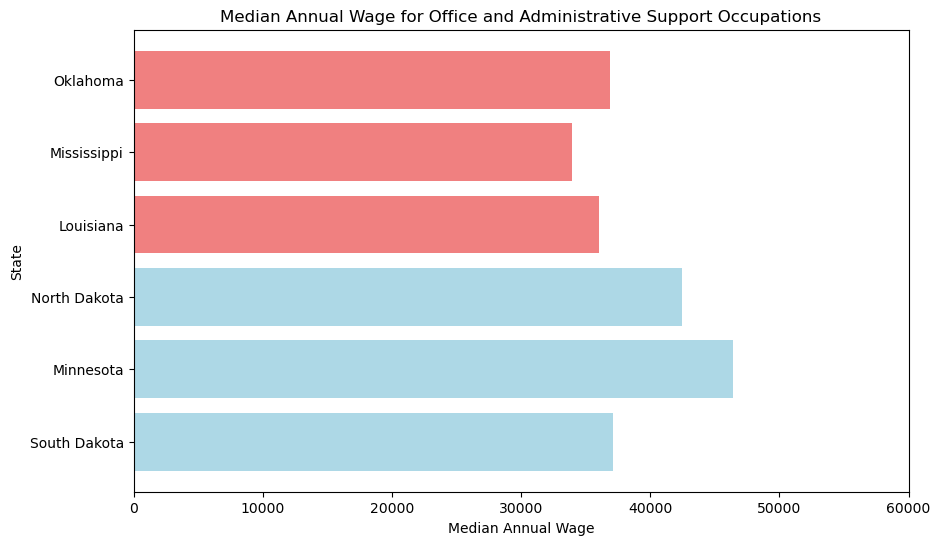

In [462]:
plt.figure(figsize=(10, 6))

for state, df in states_data.items():
    row_data = df[df['Occupation'] == 'Office and Administrative Support Occupations']
    row_data['Median Annual Wage'] = pd.to_numeric(row_data['Median Annual Wage'].replace('[\$,]', '', regex=True), errors='coerce')
    plt.barh(state, row_data['Median Annual Wage'].values[0], color=colors[state])

plt.xlim(0, 60000)
plt.title('Median Annual Wage for Office and Administrative Support Occupations')
plt.xlabel('Median Annual Wage')
plt.ylabel('State')

plt.show()


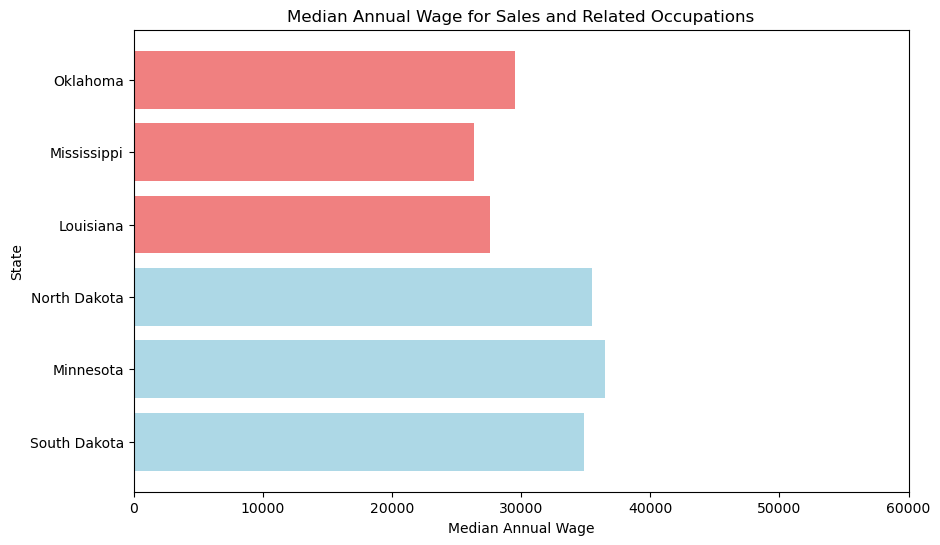

In [464]:
plt.figure(figsize=(10, 6))

for state, df in states_data.items():
    row_data = df[df['Occupation'] == 'Sales and Related Occupations']
    row_data['Median Annual Wage'] = pd.to_numeric(row_data['Median Annual Wage'].replace('[\$,]', '', regex=True), errors='coerce')
    plt.barh(state, row_data['Median Annual Wage'].values[0], color=colors[state])

plt.xlim(0, 60000)
plt.title('Median Annual Wage for Sales and Related Occupations')
plt.xlabel('Median Annual Wage')
plt.ylabel('State')

plt.show()


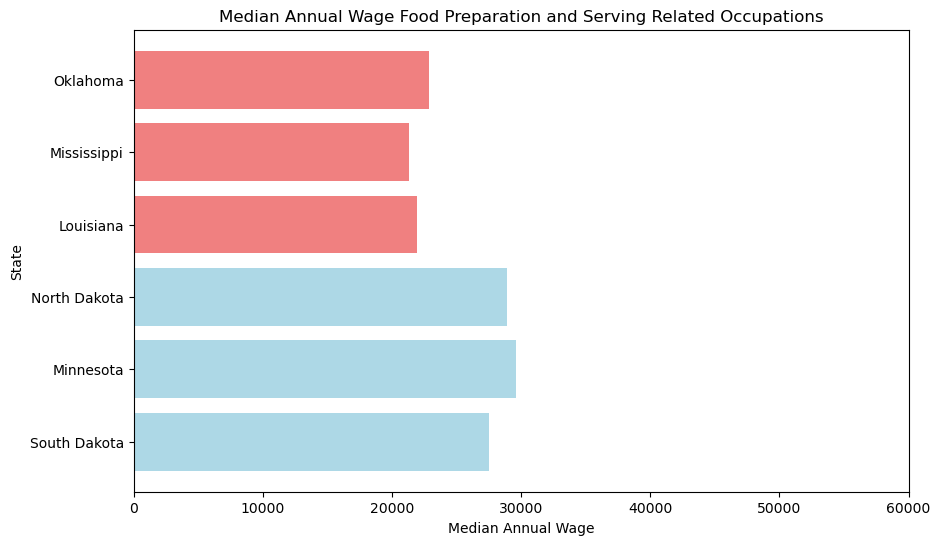

In [466]:
plt.figure(figsize=(10, 6))

for state, df in states_data.items():
    row_data = df[df['Occupation'] == 'Food Preparation and Serving Related Occupations']
    row_data['Median Annual Wage'] = pd.to_numeric(row_data['Median Annual Wage'].replace('[\$,]', '', regex=True), errors='coerce')
    plt.barh(state, row_data['Median Annual Wage'].values[0], color=colors[state])

plt.xlim(0, 60000)
plt.title('Median Annual Wage Food Preparation and Serving Related Occupations')
plt.xlabel('Median Annual Wage')
plt.ylabel('State')

plt.show()


### Percent of Population Employed

In [469]:
csvpath = os.path.join("csv-data", "employment_data.csv")
employment_data_raw = pd.read_csv(csvpath) 

columns_to_select = [
    'Geographic Area Name',
    'Estimate!!EMPLOYMENT STATUS!!Population 16 years and over',
    'Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force',
    'Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Employed',
    'Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Unemployed',
    'Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Armed Forces',
    'Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!Not in labor force'
]

employment_data_selected = employment_data_raw.filter(items=columns_to_select)

employment_data_selected = employment_data_selected.rename(columns={
    'Geographic Area Name': 'State',
    'Estimate!!EMPLOYMENT STATUS!!Population 16 years and over': 'Population 16+',
    'Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force': 'Population 16+ in Civilian Labor Force',
    'Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Employed': 'Employed Population 16+ in Civilian Labor Force',
    'Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Unemployed': 'Unemployed Population 16+ in Civilian Labor Force',
    'Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Armed Forces': 'Population 16+ in Armed Forces',
    'Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!Not in labor force': 'Population 16+ Not in Labor Force'

})

employment_data_selected




,State,Population 16+,Population 16+ in Civilian Labor Force,Employed Population 16+ in Civilian Labor Force,Unemployed Population 16+ in Civilian Labor Force,Population 16+ in Armed Forces,Population 16+ Not in Labor Force
0,Louisiana,3656541,2155084,2038340,116744,18423,1483034
1,Minnesota,4579443,3108458,3008627,99831,3430,1467555
2,Mississippi,2341292,1322376,1257562,64814,15010,1003906
3,North Dakota,617710,417556,408563,8993,6557,193597
4,Oklahoma,3178852,1916016,1836305,79711,24512,1238324
5,South Dakota,716965,474292,460983,13309,5452,237221


In [158]:
south_dakota_data = employment_data_selected[employment_data_selected['State'] == 'South Dakota']
minnesota_data = employment_data_selected[employment_data_selected['State'] == 'Minnesota']
north_dakota_data = employment_data_selected[employment_data_selected['State'] == 'North Dakota']

unemployed_labor_force_sd = south_dakota_data['Unemployed Population 16+ in Civilian Labor Force'].values[0]
civilian_labor_force_sd = south_dakota_data['Population 16+ in Civilian Labor Force'].values[0]
unemployment_sd = (unemployed_labor_force_sd / civilian_labor_force_sd) * 100

unemployed_labor_force_mn = minnesota_data['Unemployed Population 16+ in Civilian Labor Force'].values[0]
civilian_labor_force_mn = minnesota_data['Population 16+ in Civilian Labor Force'].values[0]
unemployment_mn = (unemployed_labor_force_mn / civilian_labor_force_mn) * 100

unemployed_labor_force_nd = north_dakota_data['Unemployed Population 16+ in Civilian Labor Force'].values[0]
civilian_labor_force_nd = north_dakota_data['Population 16+ in Civilian Labor Force'].values[0]
unemployment_nd = (unemployed_labor_force_nd / civilian_labor_force_nd) * 100


In [159]:
south_dakota_data = employment_data_selected[employment_data_selected['State'] == 'South Dakota']
minnesota_data = employment_data_selected[employment_data_selected['State'] == 'Minnesota']
north_dakota_data = employment_data_selected[employment_data_selected['State'] == 'North Dakota']

not_in_labor_force_sd = south_dakota_data['Population 16+ Not in Labor Force'].values[0]
population_16_plus_sd = south_dakota_data['Population 16+'].values[0]
out_of_labor_force_sd = (not_in_labor_force_sd / population_16_plus_sd) * 100

not_in_labor_force_mn = minnesota_data['Population 16+ Not in Labor Force'].values[0]
population_16_plus_mn = minnesota_data['Population 16+'].values[0]
out_of_labor_force_mn = (not_in_labor_force_mn / population_16_plus_mn) * 100

not_in_labor_force_nd = north_dakota_data['Population 16+ Not in Labor Force'].values[0]
population_16_plus_nd = north_dakota_data['Population 16+'].values[0]
out_of_labor_force_nd = (not_in_labor_force_nd / population_16_plus_nd) * 100



In [160]:
louisiana_data = employment_data_selected[employment_data_selected['State'] == 'Louisiana']
mississippi_data = employment_data_selected[employment_data_selected['State'] == 'Mississippi']
oklahoma_data = employment_data_selected[employment_data_selected['State'] == 'Oklahoma']

not_in_labor_force_la = louisiana_data['Population 16+ Not in Labor Force'].values[0]
population_16_plus_la = louisiana_data['Population 16+'].values[0]
out_of_labor_force_la = (not_in_labor_force_la / population_16_plus_la) * 100

not_in_labor_force_ms = mississippi_data['Population 16+ Not in Labor Force'].values[0]
population_16_plus_ms = mississippi_data['Population 16+'].values[0]
out_of_labor_force_ms = (not_in_labor_force_ms / population_16_plus_ms) * 100

not_in_labor_force_ok = oklahoma_data['Population 16+ Not in Labor Force'].values[0]
population_16_plus_ok = oklahoma_data['Population 16+'].values[0]
out_of_labor_force_ok = (not_in_labor_force_ok / population_16_plus_ok) * 100


In [161]:
louisiana_data = employment_data_selected[employment_data_selected['State'] == 'Louisiana']
oklahoma_data = employment_data_selected[employment_data_selected['State'] == 'Oklahoma']
mississippi_data = employment_data_selected[employment_data_selected['State'] == 'Mississippi']

unemployed_labor_force_la = louisiana_data['Unemployed Population 16+ in Civilian Labor Force'].values[0]
civilian_labor_force_la = louisiana_data['Population 16+ in Civilian Labor Force'].values[0]
unemployment_la = (unemployed_labor_force_la / civilian_labor_force_la) * 100

unemployed_labor_force_ok = oklahoma_data['Unemployed Population 16+ in Civilian Labor Force'].values[0]
civilian_labor_force_ok = oklahoma_data['Population 16+ in Civilian Labor Force'].values[0]
unemployment_ok = (unemployed_labor_force_ok / civilian_labor_force_ok) * 100

unemployed_labor_force_ms = mississippi_data['Unemployed Population 16+ in Civilian Labor Force'].values[0]
civilian_labor_force_ms = mississippi_data['Population 16+ in Civilian Labor Force'].values[0]
unemployment_ms = (unemployed_labor_force_ms / civilian_labor_force_ms) * 100


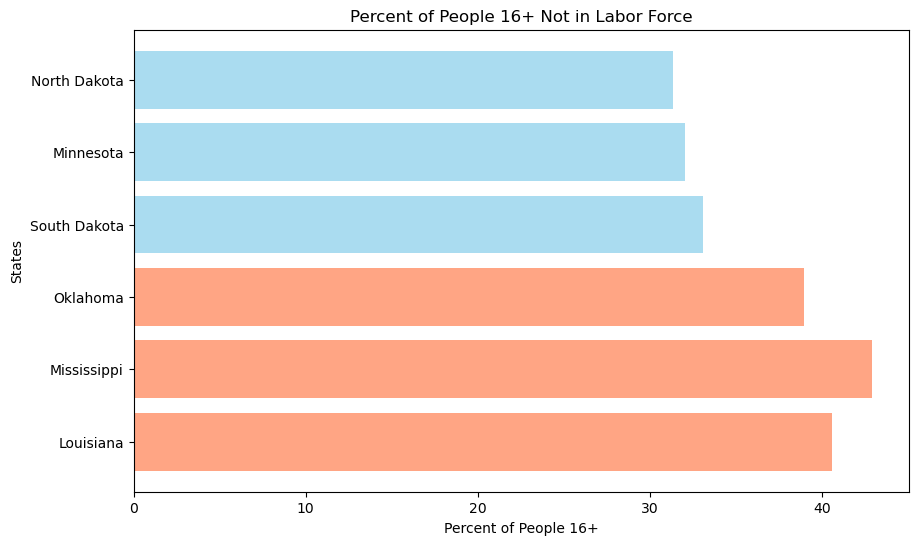

In [162]:
lad_states = ['South Dakota', 'Minnesota', 'North Dakota']
out_of_labor_force_lad_states = [out_of_labor_force_sd, out_of_labor_force_mn, out_of_labor_force_nd]

had_states = ['Louisiana', 'Mississippi', 'Oklahoma']
out_of_labor_force_had_states = [out_of_labor_force_la, out_of_labor_force_ms, out_of_labor_force_ok]

plt.figure(figsize=(10, 6))

plt.barh(had_states, out_of_labor_force_had_states, label='LA, OK, MS', color='coral', alpha=0.7)
plt.barh(lad_states, out_of_labor_force_lad_states, label='SD, MN, ND', color='skyblue', alpha=0.7)


plt.title('Percent of People 16+ Not in Labor Force')
plt.xlabel('Percent of People 16+')
plt.ylabel('States')

plt.show()

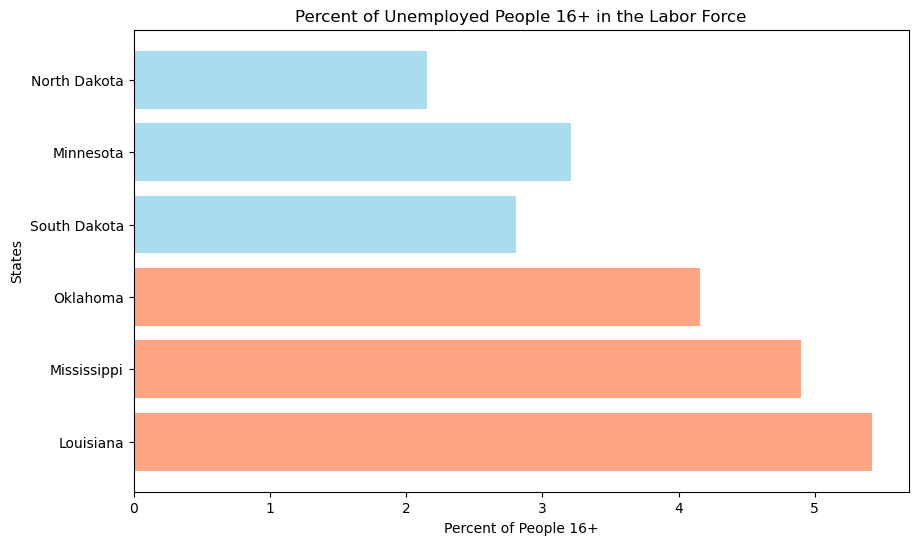

In [163]:
lad_states = ['South Dakota', 'Minnesota', 'North Dakota']
unemployed_lad_states = [unemployment_sd, unemployment_mn, unemployment_nd]

had_states = ['Louisiana', 'Mississippi', 'Oklahoma']
unemployed_had_states = [unemployment_la, unemployment_ms, unemployment_ok]

plt.figure(figsize=(10, 6))

plt.barh(had_states, unemployed_had_states, label='LA, OK, MS', color='coral', alpha=0.7)
plt.barh(lad_states, unemployed_lad_states, label='SD, MN, ND', color='skyblue', alpha=0.7)


plt.title('Percent of Unemployed People 16+ in the Labor Force')
plt.xlabel('Percent of People 16+')
plt.ylabel('States')

plt.show()

### Education Spending

In [316]:
csvpath = os.path.join("csv-data", "state_spending_data.csv")
df = pd.read_csv(csvpath) 
coi = ['Total (in thousands)', 'Salaries and wages', 'Employee benefits']
df_coi = df[['State'] + coi + ['Population']]
states_of_interest = ['Oklahoma', 'North Dakota', 'South Dakota', 'Mississippi', 'Minnesota', 'Louisiana']
df_filtered_coi = df_coi[df_coi.iloc[:, 0].isin(states_of_interest)].copy()


In [323]:
df_filtered_coi['Depression Level'] = df_filtered_coi['State'].apply(
    lambda x: 'High' if x in ['Louisiana', 'Mississippi', 'Oklahoma'] else 'Low'
)

df_filtered_coi = df_filtered_coi.sort_values(by='Depression Level')
print("State Spending on Primary Education")

df_filtered_coi

State Spending on Primary Education


,State,Total (in thousands),Salaries and wages,Employee benefits,Population,Depression Level,total_per_capita_spending,salary_per_capita_spending,benefits_per_capita_spending
18,Louisiana,8294370,4150319,2111353,4573749,High,1813.472930,907.421680,461.624151
24,Mississippi,4489746,2642499,939780,2939690,High,1527.285530,898.903966,319.686770
36,Oklahoma,6470669,3564499,1242558,4053824,High,1596.188932,879.292984,306.515034
23,Minnesota,11984619,7193443,2524377,5737915,Low,2088.671408,1253.668449,439.946740
34,North Dakota,1759225,1049140,402335,783926,Low,2244.121256,1338.315096,513.230841
41,South Dakota,1544738,914918,261932,919318,Low,1680.308664,995.213843,284.919908


In [324]:
columns_to_convert = ['Total (in thousands)', 'Salaries and wages', 'Employee benefits', 'Population']
df_filtered_coi[columns_to_convert] = df_filtered_coi[columns_to_convert].astype(int)
df_filtered_coi_percapita = df_filtered_coi

df_filtered_coi_percapita['total_per_capita_spending'] = df_filtered_coi_percapita['Total (in thousands)'] / df_filtered_coi_percapita['Population'] * 1000
df_filtered_coi_percapita['salary_per_capita_spending'] = df_filtered_coi_percapita['Salaries and wages'] / df_filtered_coi_percapita['Population'] * 1000
df_filtered_coi_percapita['benefits_per_capita_spending'] = df_filtered_coi_percapita['Employee benefits'] / df_filtered_coi_percapita['Population'] * 1000

print("State Spending on Primary Education Per Capita")

df_filtered_coi_percapita

State Spending on Primary Education Per Capita


,State,Total (in thousands),Salaries and wages,Employee benefits,Population,Depression Level,total_per_capita_spending,salary_per_capita_spending,benefits_per_capita_spending
18,Louisiana,8294370,4150319,2111353,4573749,High,1813.472930,907.421680,461.624151
24,Mississippi,4489746,2642499,939780,2939690,High,1527.285530,898.903966,319.686770
36,Oklahoma,6470669,3564499,1242558,4053824,High,1596.188932,879.292984,306.515034
23,Minnesota,11984619,7193443,2524377,5737915,Low,2088.671408,1253.668449,439.946740
34,North Dakota,1759225,1049140,402335,783926,Low,2244.121256,1338.315096,513.230841
41,South Dakota,1544738,914918,261932,919318,Low,1680.308664,995.213843,284.919908


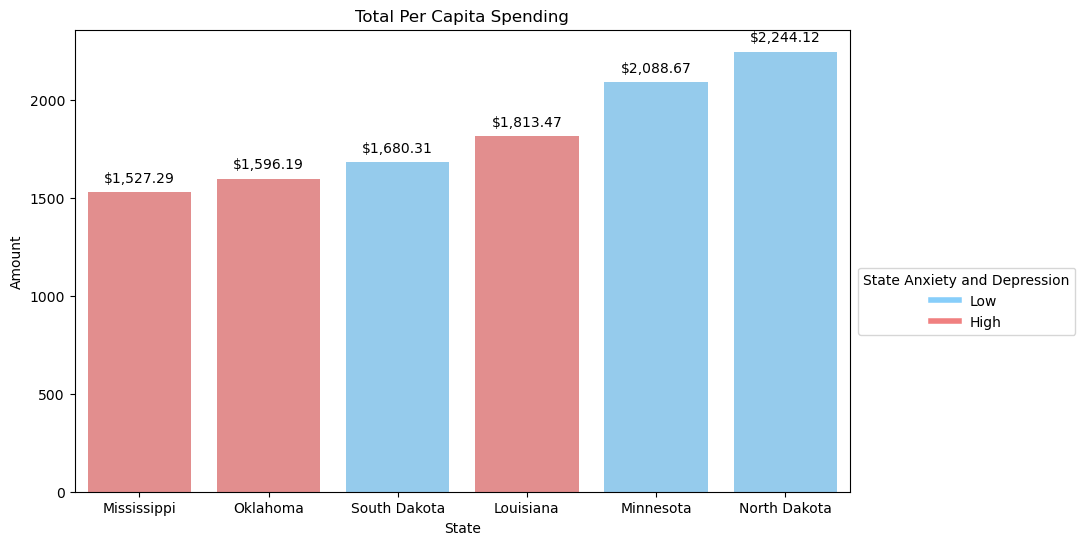

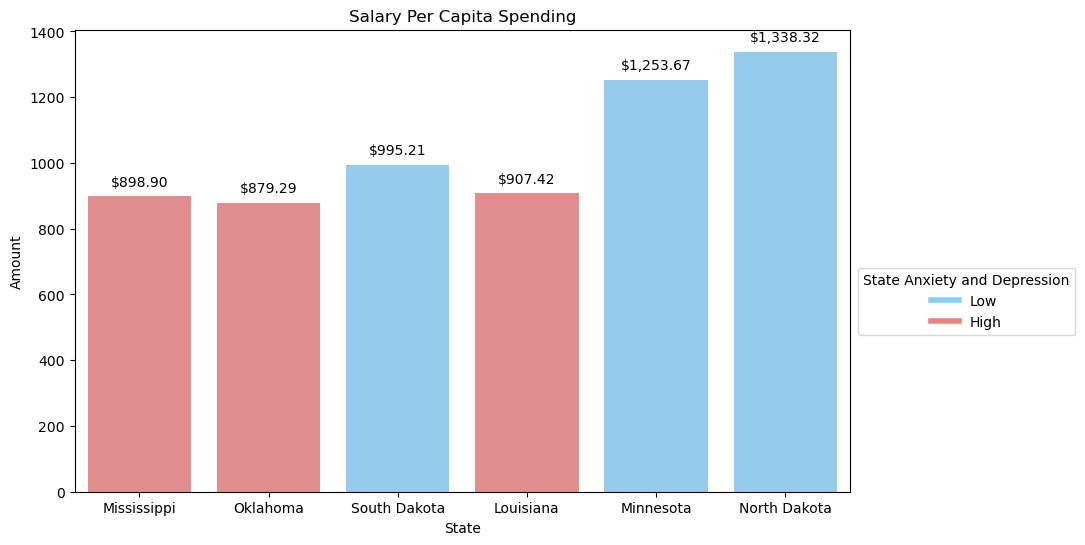

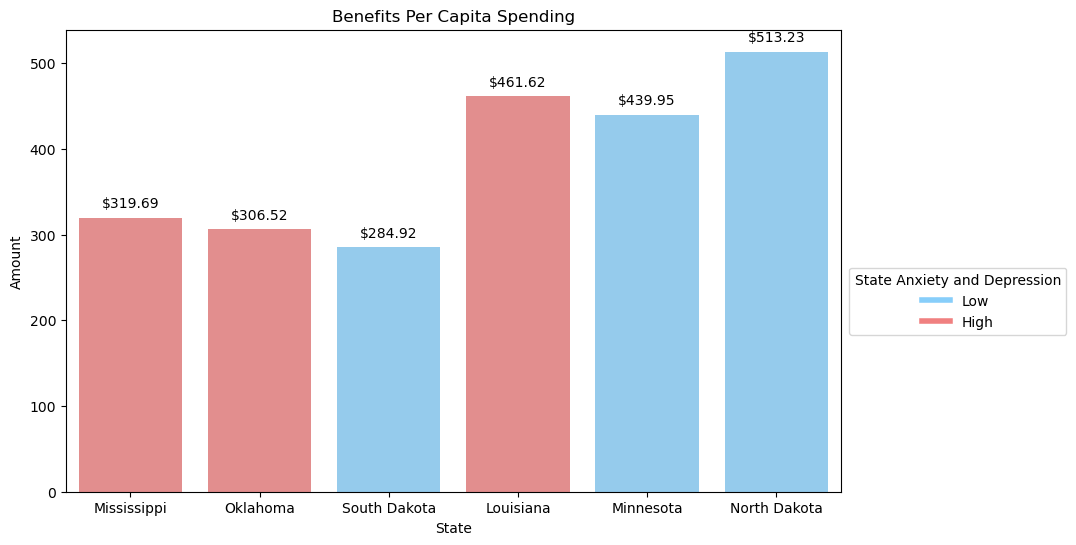

In [328]:
plot_df = df_filtered_coi_percapita.sort_values('total_per_capita_spending')

state_colors = {
    'Louisiana': 'lightcoral',
    'Mississippi': 'lightcoral',
    'Oklahoma': 'lightcoral',
    'North Dakota': 'lightskyblue',
    'South Dakota': 'lightskyblue',
    'Minnesota': 'lightskyblue'
}
colors = plot_df['State'].map(state_colors).fillna('gray')


def annotate_bars(ax):
    for p in ax.patches:
        ax.annotate(f"${p.get_height():,.2f}",
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 10), textcoords='offset points')

plt.figure(figsize=(10, 6))
sns.barplot(x='State', y='total_per_capita_spending', data=plot_df, palette=colors)
plt.title('Total Per Capita Spending')
plt.ylabel('Amount')
annotate_bars(plt.gca()) 
legend_labels = [plt.Line2D([0], [0], color='lightskyblue', lw=4),
                 plt.Line2D([0], [0], color='lightcoral', lw=4)]
plt.legend(legend_labels, ['Low', 'High'], title='State Anxiety and Depression', loc='upper right', bbox_to_anchor=(1.3, .5))
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='State', y='salary_per_capita_spending', data=plot_df, palette=colors)
plt.title('Salary Per Capita Spending')
plt.ylabel('Amount')
annotate_bars(plt.gca())  
legend_labels = [plt.Line2D([0], [0], color='lightskyblue', lw=4),
                 plt.Line2D([0], [0], color='lightcoral', lw=4)]
plt.legend(legend_labels, ['Low', 'High'], title='State Anxiety and Depression', loc='upper right', bbox_to_anchor=(1.3, .5))
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='State', y='benefits_per_capita_spending', data=plot_df, palette=colors)
plt.title('Benefits Per Capita Spending')
plt.ylabel('Amount')
annotate_bars(plt.gca())  
legend_labels = [plt.Line2D([0], [0], color='lightskyblue', lw=4),
                 plt.Line2D([0], [0], color='lightcoral', lw=4)]
plt.legend(legend_labels, ['Low', 'High'], title='State Anxiety and Depression', loc='upper right', bbox_to_anchor=(1.3, .5))
plt.show()

## Educational Attainment

In [414]:
csvpath = os.path.join("csv-data", "educational-attainment.csv")

df = pd.read_csv(csvpath)

desired_columns = [col for col in df.columns if any(state in col for state in ['Label (Grouping)', 'South Dakota!!Estimate', 'Minnesota!!Estimate', 'North Dakota!!Estimate', 'Louisiana!!Estimate', 'Mississippi!!Estimate', 'Oklahoma!!Estimate'])]

In [415]:
state_df = df[desired_columns]
desired_rows_df = state_df.iloc[:6]


In [423]:
column_mapping = {
    'Label (Grouping)': 'Label',
    'Louisiana!!Estimate': 'Louisiana',
    'Minnesota!!Estimate': 'Minnesota',
    'Mississippi!!Estimate': 'Mississippi',
    'North Dakota!!Estimate': 'North Dakota',
    'Oklahoma!!Estimate': 'Oklahoma',
    'South Dakota!!Estimate': 'South Dakota'
}

desired_rows_df = df[['Label (Grouping)', 'Louisiana!!Estimate','Mississippi!!Estimate', 'Oklahoma!!Estimate', 'Minnesota!!Estimate', 'North Dakota!!Estimate', 'South Dakota!!Estimate']].copy()
desired_rows_df.columns = [column_mapping.get(col, col) for col in desired_rows_df.columns]

desired_rows_df = desired_rows_df.iloc[:6]

desired_rows_df

,Label,Louisiana,Mississippi,Oklahoma,Minnesota,North Dakota,South Dakota
0,Total:,"3,096,121","1,963,322","2,661,141","3,918,565","514,786","605,735"
1,Less than high school graduate,"393,283","243,526","277,868","233,881","31,578","41,373"
2,High school graduate (includes equivalency),"1,006,184","604,163","813,545","917,132","131,842","177,171"
3,Some college or associate's degree,"856,548","629,447","810,811","1,233,841","187,525","195,874"
4,Bachelor's degree,"525,044","297,480","495,467","995,083","115,034","131,481"
5,Graduate or professional degree,"315,062","188,706","263,450","538,628","48,807","59,836"


In [424]:
desired_rows_df.to_csv('desired_rows.csv', index=True)

print(desired_rows_df.to_string(index=False, line_width=2000))

                                          Label Louisiana Mississippi  Oklahoma Minnesota North Dakota South Dakota
                                         Total: 3,096,121   1,963,322 2,661,141 3,918,565      514,786      605,735
                 Less than high school graduate   393,283     243,526   277,868   233,881       31,578       41,373
    High school graduate (includes equivalency) 1,006,184     604,163   813,545   917,132      131,842      177,171
             Some college or associate's degree   856,548     629,447   810,811 1,233,841      187,525      195,874
                              Bachelor's degree   525,044     297,480   495,467   995,083      115,034      131,481
                Graduate or professional degree   315,062     188,706   263,450   538,628       48,807       59,836


In [425]:
desired_columns = ['Label', 'Louisiana', 'Mississippi', 'Oklahoma']
specific_states_df = desired_rows_df.loc[:, desired_columns]

specific_states_df

,Label,Louisiana,Mississippi,Oklahoma
0,Total:,"3,096,121","1,963,322","2,661,141"
1,Less than high school graduate,"393,283","243,526","277,868"
2,High school graduate (includes equivalency),"1,006,184","604,163","813,545"
3,Some college or associate's degree,"856,548","629,447","810,811"
4,Bachelor's degree,"525,044","297,480","495,467"
5,Graduate or professional degree,"315,062","188,706","263,450"


In [426]:
total_pop_had = specific_states_df.iloc[0][['Louisiana', 'Mississippi', 'Oklahoma']].str.replace(',', '').astype(int).sum()


Total for the first row: 7720584


In [427]:
total_less_than_hs_had = specific_states_df.iloc[1][['Louisiana', 'Mississippi', 'Oklahoma']].str.replace(',', '').astype(int).sum()
percent_of_less_than_hs_had = (total_less_than_hs_had / total_pop_had) * 100
rounded_percent = round(percent_of_less_than_hs_had)
percent_string = f"{rounded_percent}%"
print("Percentage of people with less than high school degrees in states with high anxiety and depression:", percent_string)

total_hs_had = specific_states_df.iloc[2][['Louisiana', 'Mississippi', 'Oklahoma']].str.replace(',', '').astype(int).sum()
percent_of_hs_had = (total_hs_had / total_pop_had) * 100
rounded_percent = round(percent_of_hs_had)
percent_string = f"{rounded_percent}%"
print("Percentage of people with high school degrees in states with high anxiety and depression:", percent_string)

total_with_some_college_had = specific_states_df.iloc[3][['Louisiana', 'Mississippi', 'Oklahoma']].str.replace(',', '').astype(int).sum()
percent_of_some_college_had = (total_with_some_college_had / total_pop_had) * 100
rounded_percent = round(percent_of_some_college_had)
percent_string = f"{rounded_percent}%"
print("Percentage of people with some college education in states with high anxiety and depression:", percent_string)

total_with_bachelor_had = specific_states_df.iloc[4][['Louisiana', 'Mississippi', 'Oklahoma']].str.replace(',', '').astype(int).sum()
percent_of_bachelor_had = (total_with_bachelor_had / total_pop_had) * 100
rounded_percent = round(percent_of_bachelor_had)
percent_string = f"{rounded_percent}%"
print("Percentage of people with bachelor degrees in states with high anxiety and depression:", percent_string)

total_with_graduate_had = specific_states_df.iloc[5][['Louisiana', 'Mississippi', 'Oklahoma']].str.replace(',', '').astype(int).sum()
percent_with_graduate_had = (total_with_graduate_had / total_pop_had) * 100
rounded_percent = round(percent_with_graduate_had)
percent_string = f"{rounded_percent}%"
print("Percentage of people with graduate degree in states with high anxiety and depression:", percent_string)

Percentage of people with less than high school degrees in states with high anxiety and depression: 12%
Percentage of people with high school degrees in states with high anxiety and depression: 31%
Percentage of people with some college education in states with high anxiety and depression: 30%
Percentage of people with bachelor degrees in states with high anxiety and depression: 17%
Percentage of people with graduate degree in states with high anxiety and depression: 10%


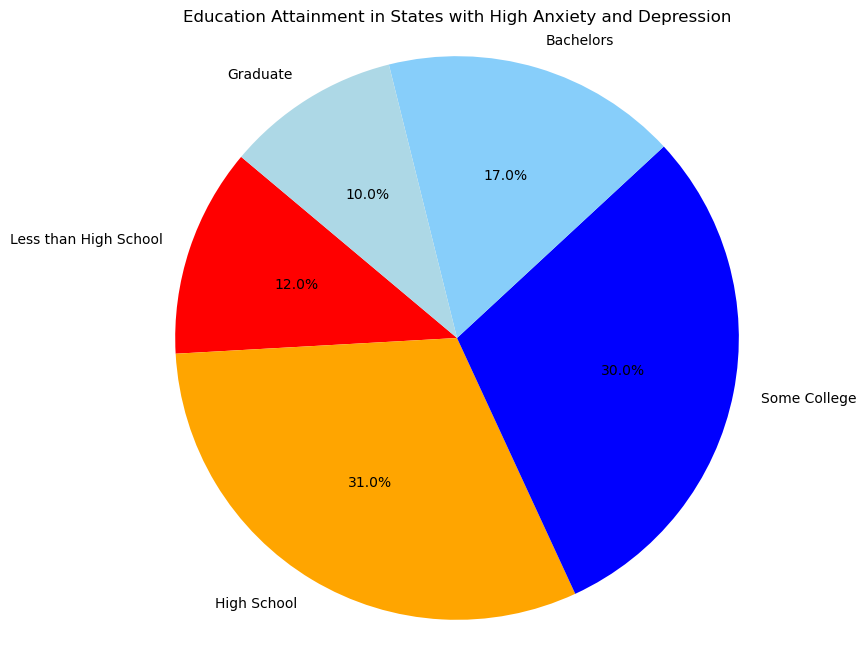

In [428]:
percent_of_less_than_hs_had = 12
percent_of_hs_had = 31
percent_of_some_college_had = 30
percent_of_bachelor_had = 17
percent_with_graduate_had = 10 

labels = ["Less than High School", "High School", "Some College", "Bachelors", "Graduate"]  # Adjust labels as needed
sizes = [12, 31, 30, 17, 10]
colors = ["red", "orange", "blue", "lightskyblue", "lightblue"]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

plt.axis("equal")

plt.title("Education Attainment in States with High Anxiety and Depression")

plt.show()

In [429]:
desired_columns = ['Label', 'Minnesota', 'North Dakota', 'South Dakota']
specific_states_df = desired_rows_df.loc[:, desired_columns]

specific_states_df

,Label,Minnesota,North Dakota,South Dakota
0,Total:,"3,918,565","514,786","605,735"
1,Less than high school graduate,"233,881","31,578","41,373"
2,High school graduate (includes equivalency),"917,132","131,842","177,171"
3,Some college or associate's degree,"1,233,841","187,525","195,874"
4,Bachelor's degree,"995,083","115,034","131,481"
5,Graduate or professional degree,"538,628","48,807","59,836"


In [430]:
total_pop_lad = specific_states_df.iloc[0][['Minnesota', 'North Dakota', 'South Dakota']].str.replace(',', '').astype(int).sum()

In [431]:
total_less_than_hs_lad = specific_states_df.iloc[1][['Minnesota', 'North Dakota', 'South Dakota']].str.replace(',', '').astype(int).sum()
percent_of_less_than_hs_lad = (total_less_than_hs_lad / total_pop_lad) * 100
rounded_percent = round(percent_of_less_than_hs_lad)
percent_string = f"{rounded_percent}%"
print("Percentage of people with less than high school degrees in states with low anxiety and depression:", percent_string)

total_hs_lad = specific_states_df.iloc[2][['Minnesota', 'North Dakota', 'South Dakota']].str.replace(',', '').astype(int).sum()
percent_of_hs_lad = (total_hs_lad / total_pop_of_lad) * 100
rounded_percent = round(percent_of_hs_lad)
percent_string = f"{rounded_percent}%"
print("Percentage of people with high school degrees in states with low anxiety and depression:", percent_string)

total_with_some_college_lad = specific_states_df.iloc[3][['Minnesota', 'North Dakota', 'South Dakota']].str.replace(',', '').astype(int).sum()
percent_of_some_college_lad = (total_with_some_college_lad / total_pop_of_lad) * 100
rounded_percent = round(percent_of_some_college_lad)
percent_string = f"{rounded_percent}%"
print("Percentage of people with some college education in states with low anxiety and depression:", percent_string)

total_with_bachelor_lad = specific_states_df.iloc[4][['Minnesota', 'North Dakota', 'South Dakota']].str.replace(',', '').astype(int).sum()
percent_of_bachelor_lad = (total_with_bachelor_lad / total_pop_of_lad) * 100
rounded_percent = round(percent_of_bachelor_lad)
percent_string = f"{rounded_percent}%"
print("Percentage of people with bachelor degrees in states with low anxiety and depression:", percent_string)

total_with_graduate_lad = specific_states_df.iloc[5][['Minnesota', 'North Dakota', 'South Dakota']].str.replace(',', '').astype(int).sum()
percent_with_graduate_lad = (total_with_graduate_lad / total_pop_of_lad) * 100
rounded_percent = round(percent_with_graduate_lad)
percent_string = f"{rounded_percent}%"
print("Percentage of people with graduate degree in states with low anxiety and depression:", percent_string)

Percentage of people with less than high school degrees in states with low anxiety and depression: 6%
Percentage of people with high school degrees in states with low anxiety and depression: 24%
Percentage of people with some college education in states with low anxiety and depression: 32%
Percentage of people with bachelor degrees in states with low anxiety and depression: 25%
Percentage of people with graduate degree in states with low anxiety and depression: 13%


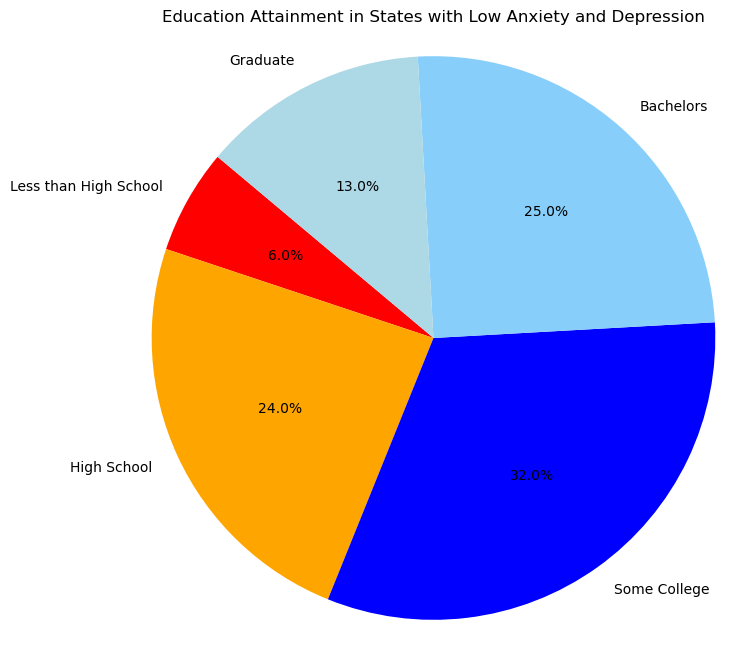

In [432]:
percent_of_less_than_hs_lad = 6
percent_of_hs_lad = 24
percent_of_some_college_lad = 32
percent_of_bachelor_lad = 25
percent_with_graduate_lad = 13  # Replace this value with your actual percentage

labels = ["Less than High School", "High School", "Some College", "Bachelors", "Graduate"]  # Adjust labels as needed
sizes = [6, 24, 32, 25, 13]
colors = ["red", "orange", "blue", "lightskyblue", "lightblue"]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

plt.axis("equal")

plt.title("Education Attainment in States with Low Anxiety and Depression")

plt.show()

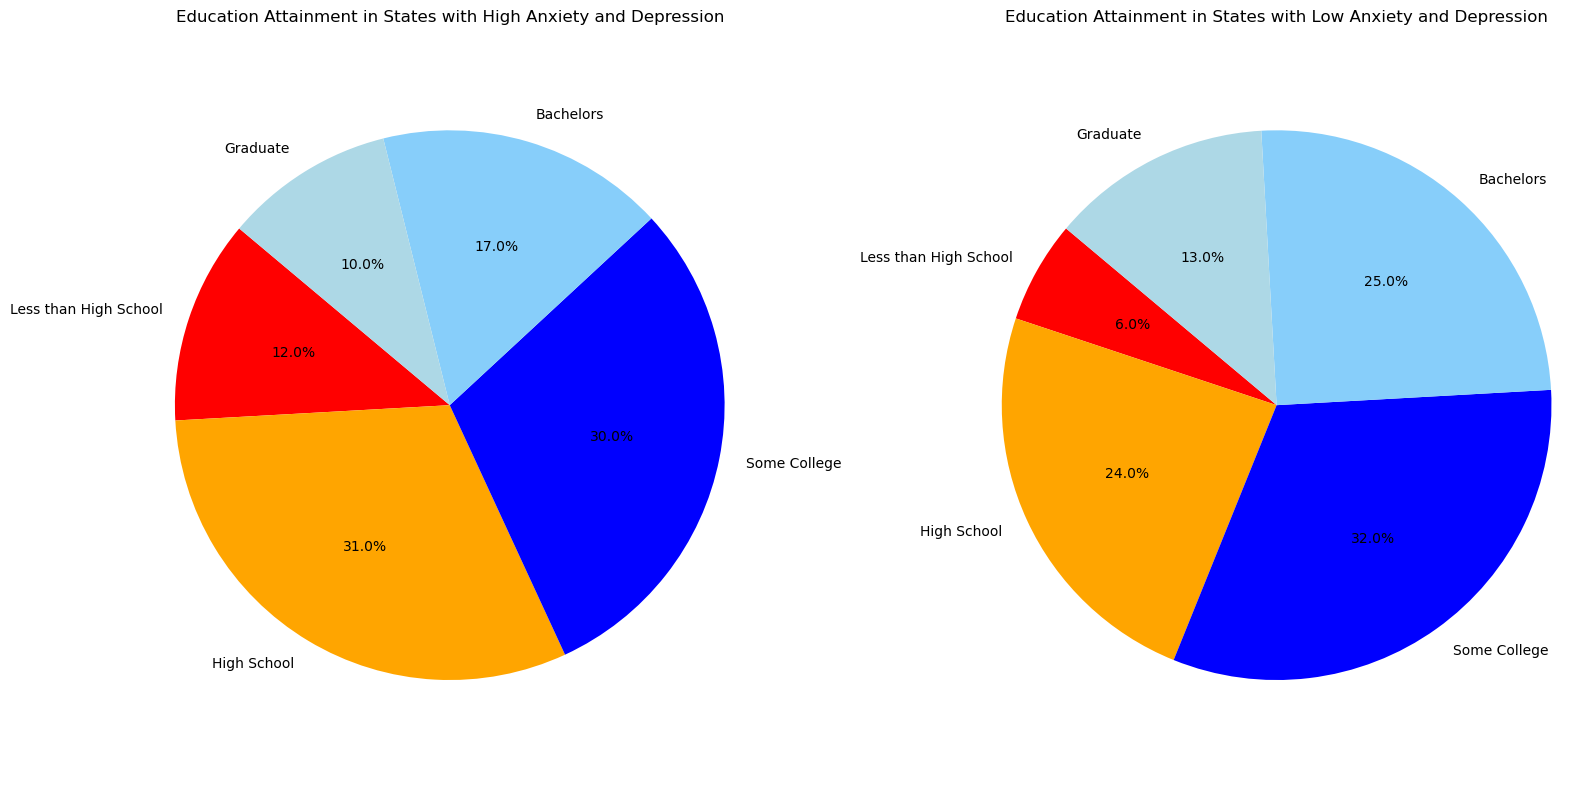

In [434]:
percent_of_less_than_hs_had = 12
percent_of_hs_had = 31
percent_of_some_college_had = 30
percent_of_bachelor_had = 17
percent_with_graduate_had = 10 

labels = ["Less than High School", "High School", "Some College", "Bachelors", "Graduate"]  
sizes = [12, 31, 30, 17, 10]
colors = ["red", "orange", "blue", "lightskyblue", "lightblue"]

plt.figure(figsize=(16, 8))  
plt.subplot(1, 2, 1)
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis("equal")
plt.title("Education Attainment in States with High Anxiety and Depression")

percent_of_less_than_hs_lad = 6
percent_of_hs_lad = 24
percent_of_some_college_lad = 32
percent_of_bachelor_lad = 25
percent_with_graduate_lad = 13  

labels_low = ["Less than High School", "High School", "Some College", "Bachelors", "Graduate"]  
sizes_low = [6, 24, 32, 25, 13]
colors_low = ["red", "orange", "blue", "lightskyblue", "lightblue"]

plt.subplot(1, 2, 2)
plt.pie(sizes_low, labels=labels_low, colors=colors_low, autopct='%1.1f%%', startangle=140)
plt.axis("equal")
plt.title("Education Attainment in States with Low Anxiety and Depression")

plt.tight_layout()
plt.show()

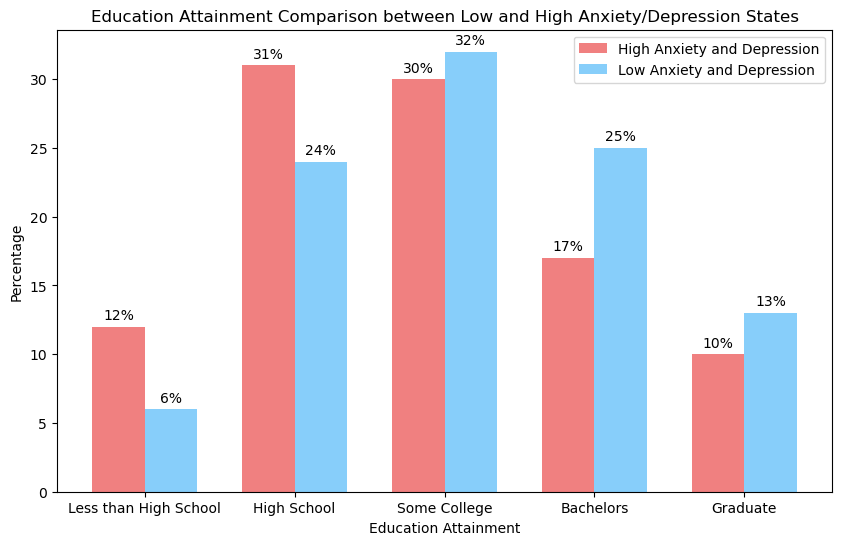

In [205]:
percent_of_less_than_hs_had_1 = 12
percent_of_hs_had_1 = 31
percent_of_some_college_hda_1 = 30
percent_of_bachelor_had_1 = 17
percent_with_graduate_had_1 = 10 

percent_of_less_than_lad_2 = 6
percent_of_hs_lad_2 = 24
percent_of_some_college_lad_2 = 32
percent_of_bachelor_lad_2 = 25
percent_with_graduate_lad_2 = 13

labels = ["Less than High School", "High School", "Some College", "Bachelors", "Graduate"]
x = np.arange(len(labels))
width = 0.35  

percentages_set1 = [percent_of_less_than_hs_had_1, percent_of_hs_had_1, 
                    percent_of_some_college_hda_1, percent_of_bachelor_had_1, 
                    percent_with_graduate_had_1]
percentages_set2 = [percent_of_less_than_lad_2, percent_of_hs_lad_2, 
                    percent_of_some_college_lad_2, percent_of_bachelor_lad_2, 
                    percent_with_graduate_lad_2]

sizes_1 = [percent_of_less_than_hs_had_1, percent_of_hs_had_1, 
           percent_of_some_college_hda_1, percent_of_bachelor_had_1, 
           percent_with_graduate_had_1]
sizes_2 = [percent_of_less_than_lad_2, percent_of_hs_lad_2, 
           percent_of_some_college_lad_2, percent_of_bachelor_lad_2, 
           percent_with_graduate_lad_2]

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, sizes_1, width, label='High Anxiety and Depression', color='lightcoral')
rects2 = ax.bar(x + width/2, sizes_2, width, label='Low Anxiety and Depression', color='lightskyblue')

ax.set_xlabel('Education Attainment')
ax.set_ylabel('Percentage')
ax.set_title('Education Attainment Comparison between Low and High Anxiety/Depression States')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects, percentages):
    for rect, percentage in zip(rects, percentages):
        height = rect.get_height()
        ax.annotate('{}%'.format(percentage),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects2, percentages_set2)
autolabel(rects1, percentages_set1)

plt.show()


## Student Debt

In [435]:
csvpath = os.path.join("csv-data", "merged_student_loan_debt.csv")

df = pd.read_csv(csvpath)


In [436]:
specific_states = ['Oklahoma','Louisiana', 'Mississippi', 'North Dakota', 'South Dakota', 'Minnesota']


In [437]:
states = df[df['state/area'].isin(specific_states)].copy()
states.reset_index(drop=True, inplace=True)
states

,Unnamed: 0,state/area,2020_x,2021_x,2020_y,2021_y
0,18,Louisiana,"$34,900","$35,000","626,300","639,300"
1,23,Minnesota,"$32,200","$32,700","888,700","884,400"
2,25,Mississippi,"$36,900","$37,500","414,700","417,600"
3,28,North Dakota,"$27,100","$28,500","96,500","114,100"
4,36,Oklahoma,"$31,800","$32,100","462,700","474,100"
5,42,South Dakota,"$28,600","$29,800","130,500","132,000"


In [438]:
pd.set_option('display.width', 200)

states.rename(columns={'state/area': 'State',
                       '2020_x': '2020 Avg Debt',
                       '2021_x': '2021 Avg Debt',
                       '2020_y': '2020 Borrowers',
                       '2021_y': '2021 Borrowers'}, inplace=True)

columns_to_convert = ['2020 Avg Debt', '2021 Avg Debt', '2020 Borrowers', '2021 Borrowers']

states[columns_to_convert] = states[columns_to_convert].replace(r'[$,]', '', regex=True)


states[columns_to_convert] = states[columns_to_convert].apply(pd.to_numeric)

states

,Unnamed: 0,State,2020 Avg Debt,2021 Avg Debt,2020 Borrowers,2021 Borrowers
0,18,Louisiana,34900,35000,626300,639300
1,23,Minnesota,32200,32700,888700,884400
2,25,Mississippi,36900,37500,414700,417600
3,28,North Dakota,27100,28500,96500,114100
4,36,Oklahoma,31800,32100,462700,474100
5,42,South Dakota,28600,29800,130500,132000


In [439]:
states_had = ['Louisiana', 'Mississippi', 'Oklahoma']
selected_columns = ['State', '2020 Avg Debt', '2021 Avg Debt', '2020 Borrowers', '2021 Borrowers']

had_data = states.loc[states['State'].isin(states_had), selected_columns]

had_data

,State,2020 Avg Debt,2021 Avg Debt,2020 Borrowers,2021 Borrowers
0,Louisiana,34900,35000,626300,639300
2,Mississippi,36900,37500,414700,417600
4,Oklahoma,31800,32100,462700,474100


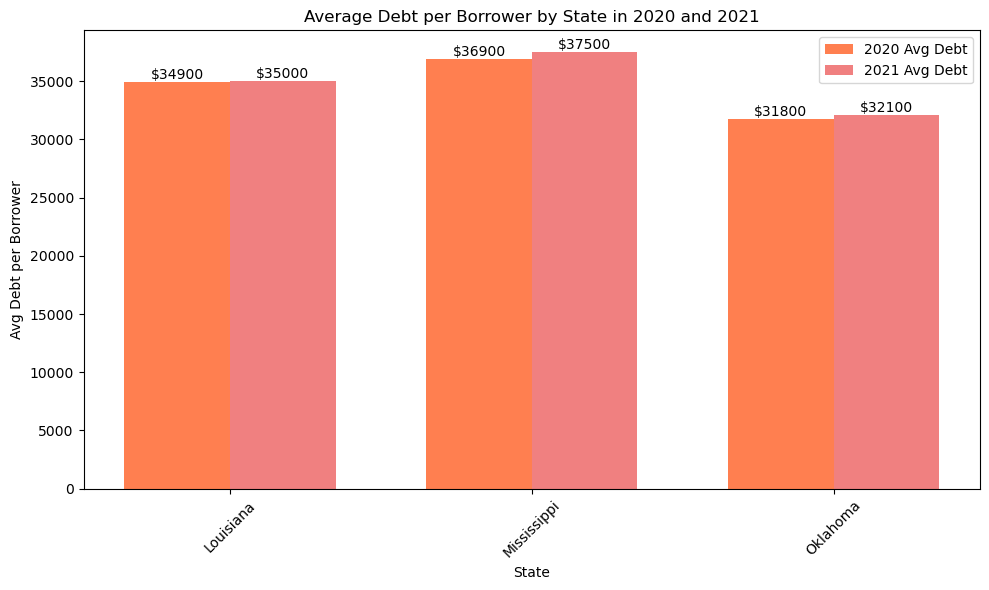

In [440]:
df = pd.DataFrame(had_data)

plt.figure(figsize=(10,6))
bar_width = 0.35
x = np.arange(len(df['State']))

bars_2020 = plt.bar(x - bar_width/2, df['2020 Avg Debt'], width=bar_width, color='coral', label='2020 Avg Debt')

bars_2021 = plt.bar(x + bar_width/2, df['2021 Avg Debt'], width=bar_width, color='lightcoral', label='2021 Avg Debt')

plt.xlabel('State')
plt.ylabel('Avg Debt per Borrower')
plt.title('Average Debt per Borrower by State in 2020 and 2021')

# Add data labels with dollar signs
for bars, column_name in zip([bars_2020, bars_2021], ['2020 Avg Debt', '2021 Avg Debt']):
    for bar, value in zip(bars, df[column_name]):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), '${}'.format(value), ha='center', va='bottom')

plt.legend()
plt.xticks(ticks=x, labels=df['State'], rotation=45)
plt.tight_layout()
plt.show()

In [217]:
total_2020_had_debt = had_data['2020 Avg Debt'].sum()

print("Total debt for 2020 high anxiety and depression states:", total_2020_had_debt)

Total debt for 2020 high anxiety and depression states: 103600


In [218]:
total_2021_had_debt = had_data['2021 Avg Debt'].sum()

print("Total debt for 2021 high anxiety and depression states:", total_2021_had_debt)

Total debt for 2021 high anxiety and depression states: 104600


In [441]:
states_lad =  ['Minnesota', 'North Dakota', 'South Dakota']
low_columns = ['State', '2020 Avg Debt', '2021 Avg Debt', '2020 Borrowers', '2021 Borrowers']

lad_data = states.loc[states['State'].isin(states_lad), low_columns]

lad_data

,State,2020 Avg Debt,2021 Avg Debt,2020 Borrowers,2021 Borrowers
1,Minnesota,32200,32700,888700,884400
3,North Dakota,27100,28500,96500,114100
5,South Dakota,28600,29800,130500,132000


In [220]:
total_2020_lad_debt = lad_data['2020 Avg Debt'].sum()

print("Total debt for 2020 low anxiety and depression states:", total_2020_lad_debt)

Total debt for 2020 low anxiety and depression states: 87900


In [221]:
total_2021_lad_debt = lad_data['2021 Avg Debt'].sum()

print("Total debt for 2021 low anxiety and depression states:", total_2021_lad_debt)

Total debt for 2021 low anxiety and depression states: 91000


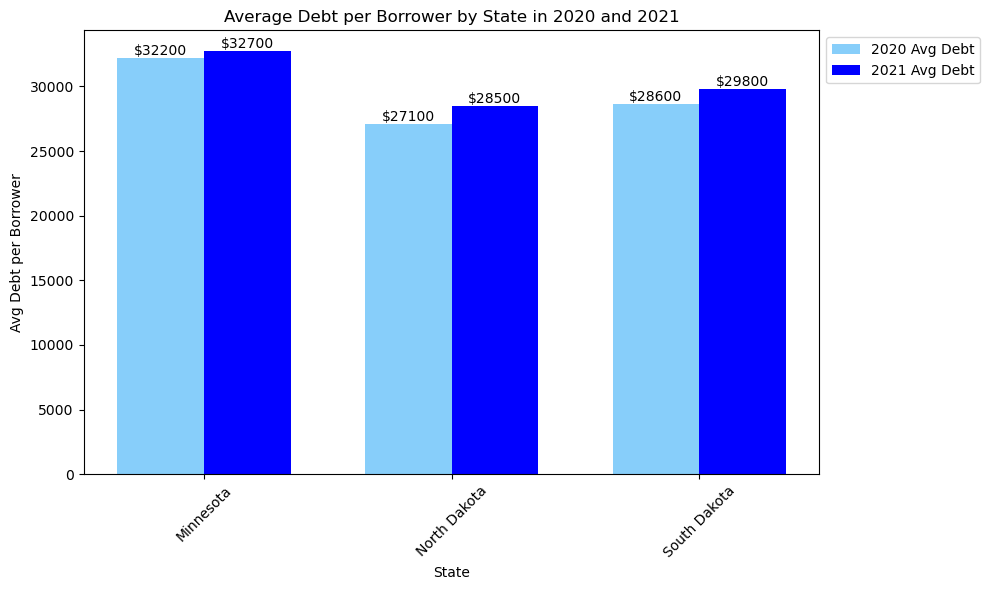

In [231]:
df = pd.DataFrame(lad_data)


plt.figure(figsize=(10, 6))
bar_width = 0.35
x = np.arange(len(df['State']))

bars_2020 = plt.bar(x - bar_width/2, df['2020 Avg Debt'], width=bar_width, color='lightskyblue', label='2020 Avg Debt')

bars_2021 = plt.bar(x + bar_width/2, df['2021 Avg Debt'], width=bar_width, color='blue', label='2021 Avg Debt')

plt.xlabel('State')
plt.ylabel('Avg Debt per Borrower')
plt.title('Average Debt per Borrower by State in 2020 and 2021')

for bars, column_name in zip([bars_2020, bars_2021], ['2020 Avg Debt', '2021 Avg Debt']):
    for bar, value in zip(bars, df[column_name]):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), '${}'.format(value), ha='center', va='bottom')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(ticks=x, labels=df['State'], rotation=45)  # Set x-axis ticks to state names
plt.tight_layout()
plt.show()

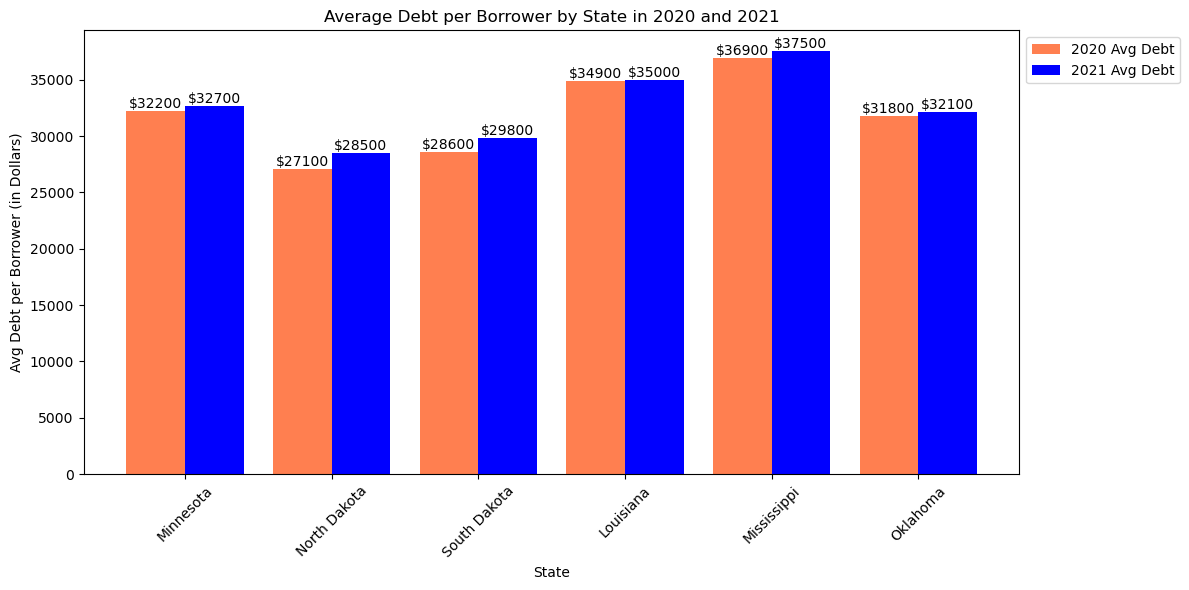

In [442]:
df_lad = pd.DataFrame(lad_data)
df_had = pd.DataFrame(had_data)

df = pd.concat([df_lad, df_had], ignore_index=True)

plt.figure(figsize=(12, 6))  
bar_width = 0.6  
x = df.index * 1.5  

bars_2020 = plt.bar(x - bar_width/2, df['2020 Avg Debt'], width=bar_width, color='coral', label='2020 Avg Debt')

bars_2021 = plt.bar(x + bar_width/2, df['2021 Avg Debt'], width=bar_width, color='blue', label='2021 Avg Debt')

plt.xlabel('State')
plt.ylabel('Avg Debt per Borrower (in Dollars)')
plt.title('Average Debt per Borrower by State in 2020 and 2021')

for bars, column_name in zip([bars_2020, bars_2021], ['2020 Avg Debt', '2021 Avg Debt']):
    for bar, value in zip(bars, df[column_name]):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), '${}'.format(value), ha='center', va='bottom')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(ticks=x, labels=df['State'], rotation=45)  
plt.tight_layout()
plt.show()

In [444]:
total_2020_had_debt = had_data['2020 Avg Debt'].sum()
total_2021_had_debt = had_data['2021 Avg Debt'].sum()
total_2020_lad_debt = lad_data['2020 Avg Debt'].sum()
total_2021_lad_debt = lad_data['2021 Avg Debt'].sum()

totals_data = {
    'Year': ['2020', '2021'],
    'LAD Total Debt': [total_2020_lad_debt, total_2021_lad_debt],
    'HAD Total Debt': [total_2020_had_debt, total_2021_had_debt]
}
totals_df = pd.DataFrame(totals_data)

print("Total Debt by Year:")
totals_df

Total Debt by Year:


,Year,LAD Total Debt,HAD Total Debt
0,2020,87900,103600
1,2021,91000,104600


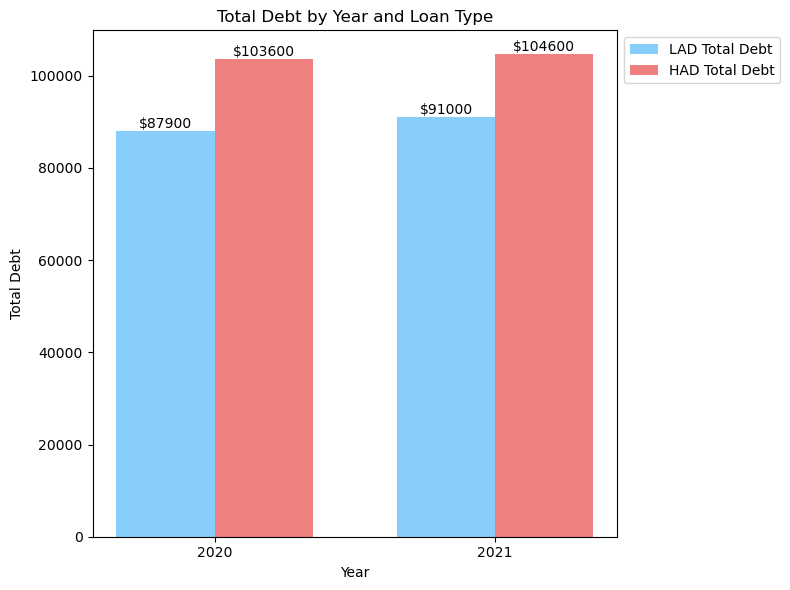

In [227]:
total_2020_had_debt = 103600 
total_2021_had_debt = 104600  
total_2020_lad_debt = 87900   
total_2021_lad_debt = 91000   

totals_data = {
    'Year': ['2020', '2021'],
    'LAD Total Debt': [total_2020_lad_debt, total_2021_lad_debt],
    'HAD Total Debt': [total_2020_had_debt, total_2021_had_debt]
}
totals_df = pd.DataFrame(totals_data)

plt.figure(figsize=(8, 6))
bar_width = 0.35
x = range(len(totals_df['Year']))

bars_lad = plt.bar(x, totals_df['LAD Total Debt'], width=bar_width, color='lightskyblue', label='LAD Total Debt')
bars_had = plt.bar([i + bar_width for i in x], totals_df['HAD Total Debt'], width=bar_width, color='lightcoral', label='HAD Total Debt')

plt.xlabel('Year')
plt.ylabel('Total Debt')
plt.title('Total Debt by Year and Loan Type')
plt.xticks([i + bar_width / 2 for i in x], totals_df['Year'])

for bars, column_name in zip([bars_lad, bars_had], ['LAD Total Debt', 'HAD Total Debt']):
    for bar, value in zip(bars, totals_df[column_name]):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), '${}'.format(value), ha='center', va='bottom')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()